# Model selection

The model is a gaussian model with laplace prior, excpet sigma that has a gamma prior

$Y$~$N(X\theta , \sigma^2I_d)$ with as prior :
 - $intercept$~$N(0,b_0)$
 - $\theta$~$Laplace(0,b_1)$
 - $\sigma$~$Gamma(a_0,b_2)$
 
Thanks to the laplace prior we can see that the mass of the prior are more concentrate around zero, which can be seen as a lasso regression. Thus we can use it to see the more relevant predictors

In [1]:
%matplotlib inline

from Baysian_framework import *
from Metropolis_hastings import *
from GVA import *
from Important_sampling import *

from Vizualisation_tool import *
from Model import *
from Model_torch import *

import seaborn as sns
import pandas as pd
import scipy as scp # optimization, probability densities and cumulative

In [2]:
df = pd.read_csv ('Real estate.csv')
# first drop usless variable 
data = df.drop(['No'],axis=1)

#Rename
data.rename(columns = {
                                'X1 transaction date': 'Date',
                                'X2 house age' : 'House_age',
                                'X3 distance to the nearest MRT station' : 'MRT_distance',
                                'X4 number of convenience stores' : 'Conv_store_count',
                                'X5 latitude' : 'Latitude',
                                'X6 longitude' : 'Longitude',
                                'Y house price of unit area' : 'Price_per_unit'
}, inplace = True)

X_names = [ 'Date' ,'House_age','MRT_distance','Conv_store_count','Latitude','Longitude' ]
Y_names = ['Price_per_unit' ]

data_tmp = data[data['Price_per_unit']<100]
data_no_outlier = data_tmp[data_tmp['Price_per_unit']>8]

#X= df[df.columns[1:-1]].to_numpy()

Y = (data_no_outlier['Price_per_unit']).to_numpy()

In [3]:
# add different predictor from the data exploration that could be more relevant 
data_no_outlier['MRT_distance_sqrt'] = np.copy(np.sqrt(data_no_outlier["MRT_distance"]))

center_longitude_max = data_no_outlier['Longitude'][np.argmax(data_no_outlier['Price_per_unit'])]
center_latitude_max = data_no_outlier['Latitude'][np.argmax(data_no_outlier['Price_per_unit'])]
distance_center_vector_max = np.c_[data_no_outlier['Longitude'] - center_longitude_max,data_no_outlier['Latitude'] - center_latitude_max]
distance_vector_max = np.linalg.norm(distance_center_vector_max,axis=1)
orientation = np.arctan2(distance_center_vector_max[:,0],distance_center_vector_max[:,1])

data_no_outlier['dist_center'] = np.sqrt(distance_vector_max)
data_no_outlier['orientation'] = orientation

# add the polynomial predictor of order 2 
Names = ['Date' ,'House_age','Conv_store_count','Latitude','Longitude', 'MRT_distance_sqrt' ,'dist_center','orientation' ]
Names_tot = ['Date' ,'House_age','Conv_store_count','Latitude','Longitude', 'MRT_distance_sqrt' ,'dist_center','orientation' ]
for name in Names :
    tmp = name+'_sqr'
    data_no_outlier[tmp] = np.copy(np.power(data_no_outlier[name],2))
    Names_tot += [tmp]




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

### Recall using gaussian prior in order to compare different priors

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 218.55it/s]


Acceptance rate :  0.2562
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.18  0.40  [36.393, 37.975]  36.41  36.93  37.18   
1               Date   1.54  0.40    [0.732, 2.340]   0.73   1.26   1.54   
2          House_age  -3.14  0.42  [-3.968, -2.306]  -3.98  -3.42  -3.12   
3   Conv_store_count   1.60  0.62    [0.364, 2.828]   0.40   1.18   1.60   
4           Latitude   1.56  0.73    [0.098, 3.015]   0.18   1.02   1.54   
5          Longitude  -1.92  0.88  [-3.670, -0.163]  -3.42  -2.55  -2.01   
6  MRT_distance_sqrt  -6.77  0.94  [-8.636, -4.896]  -8.52  -7.39  -6.77   
7        dist_center  -2.20  1.13   [-4.460, 0.068]  -4.15  -3.04  -2.30   
8        orientation   1.15  0.75   [-0.353, 2.655]  -0.30   0.68   1.16   
9              sigma   7.41  0.29    [6.825, 8.003]   6.86   7.21   7.40   

    75.0   97.5  
0  37.44  37.97  
1   1.82   2.33  
2  -2.85  -2.35  
3   2.00   2.76  
4   2.04   3.08  
5  -1.34  -0.06  
6  -6.17  -

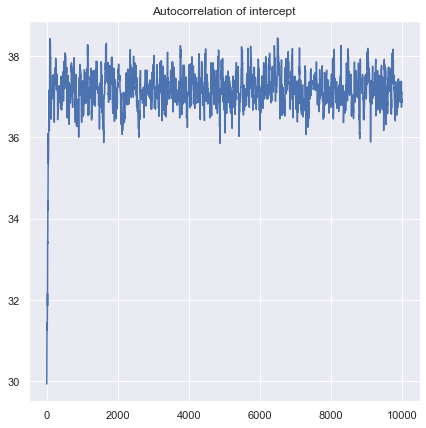

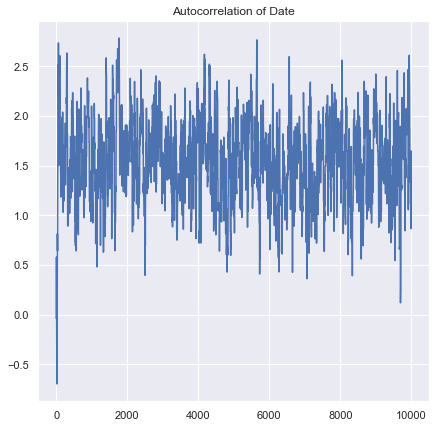

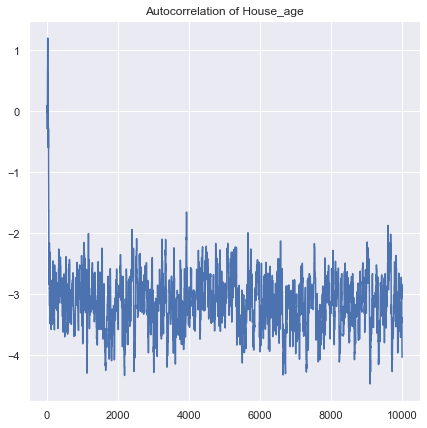

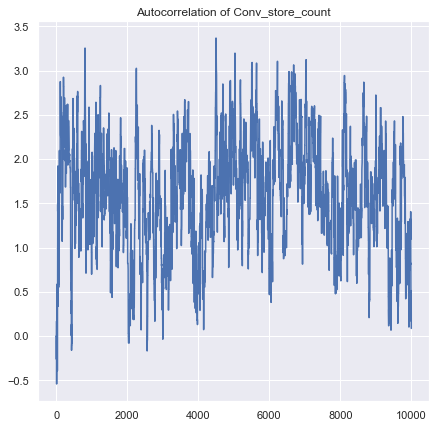

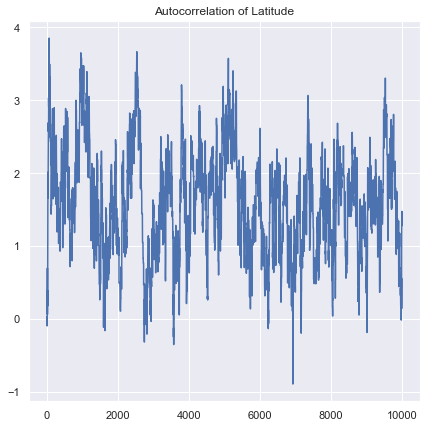

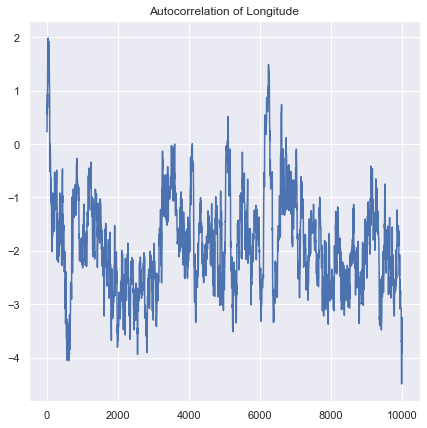

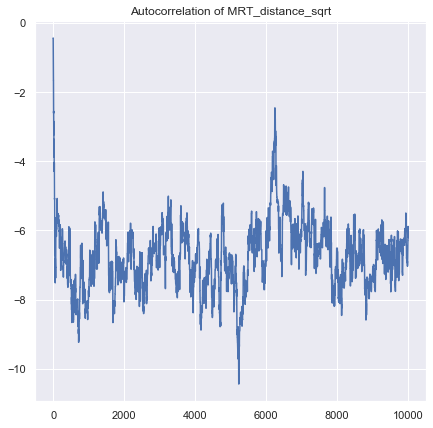

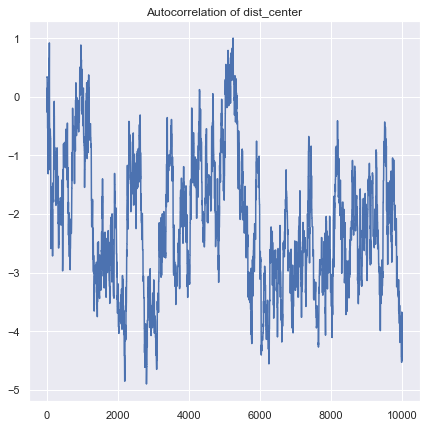

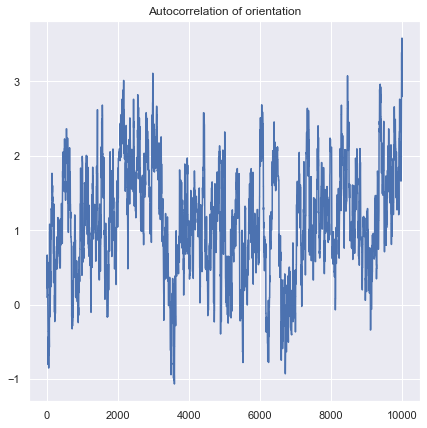

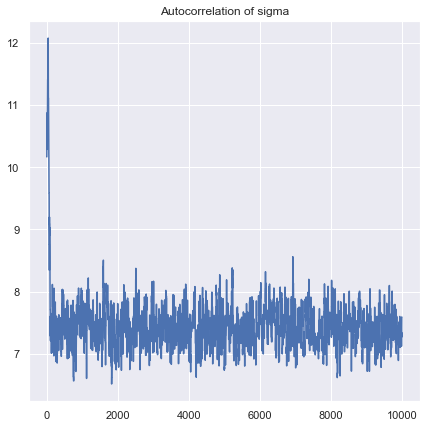

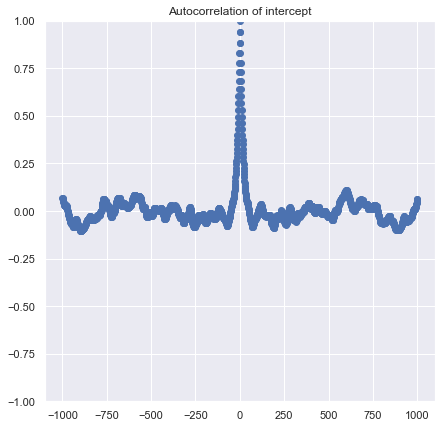

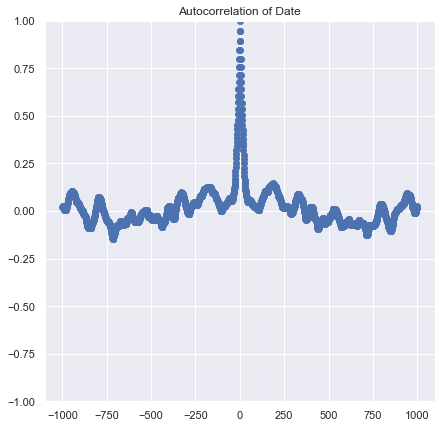

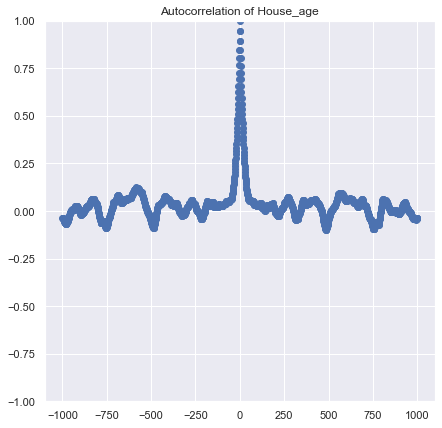

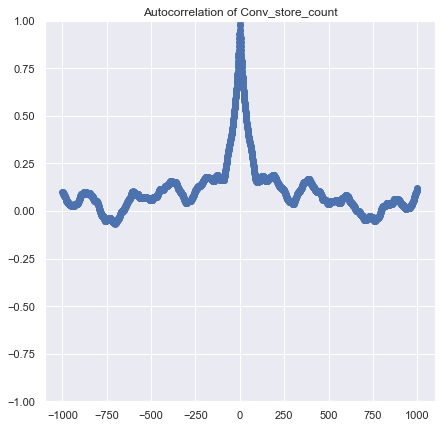

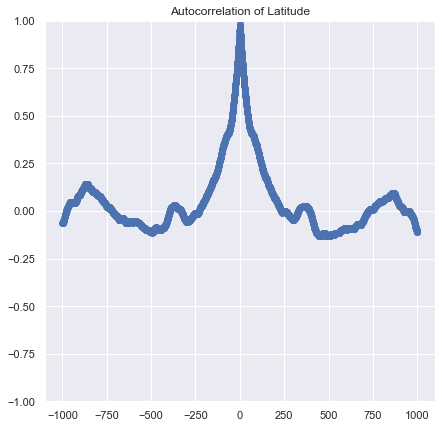

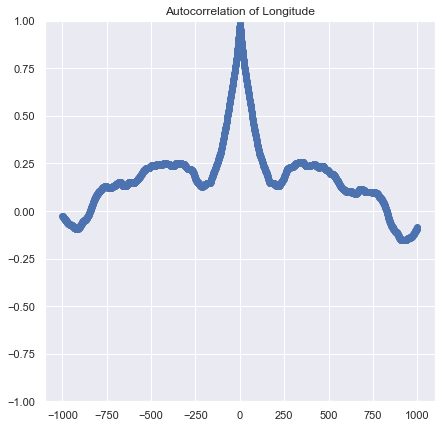

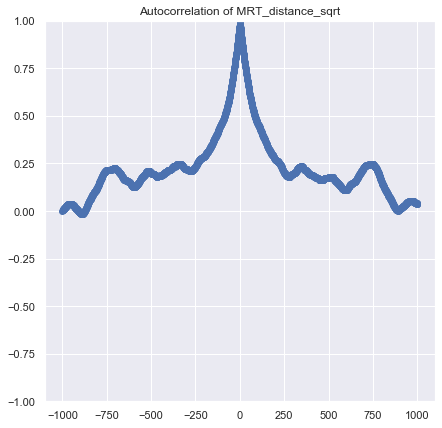

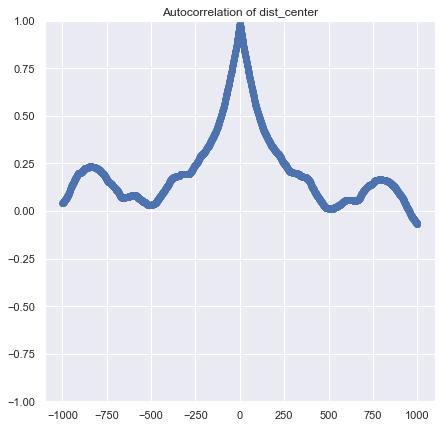

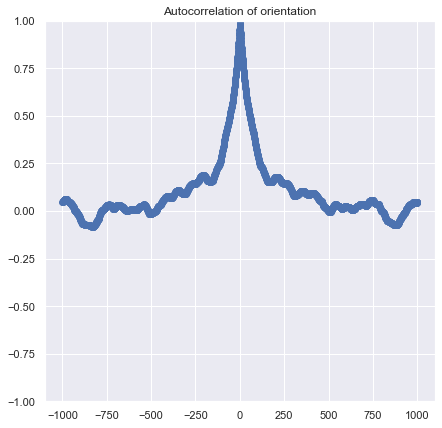

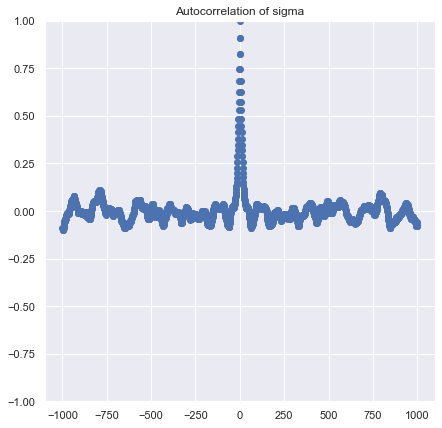

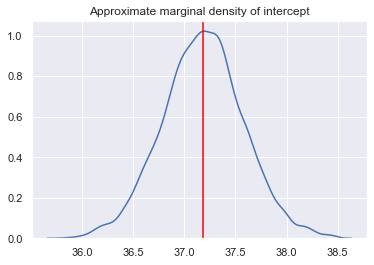

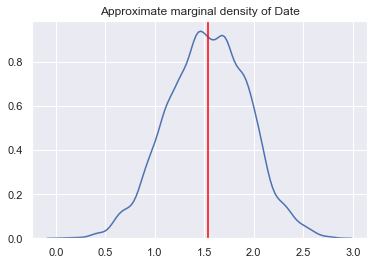

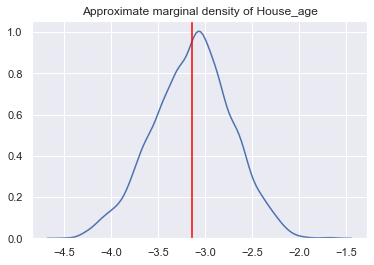

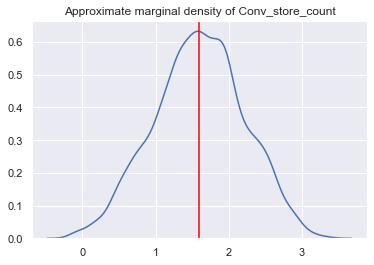

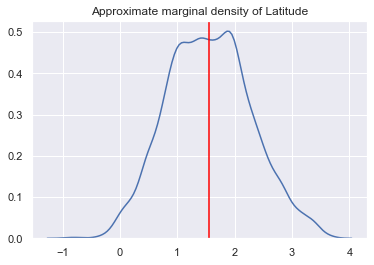

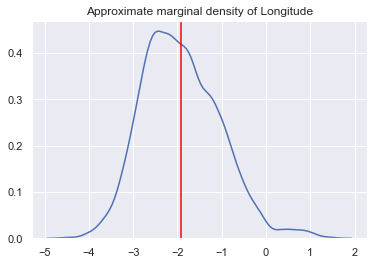

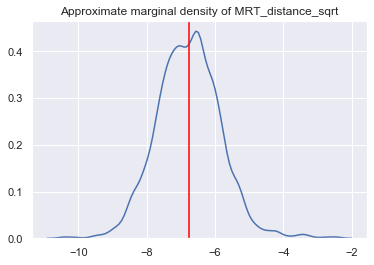

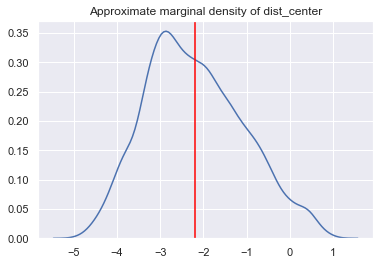

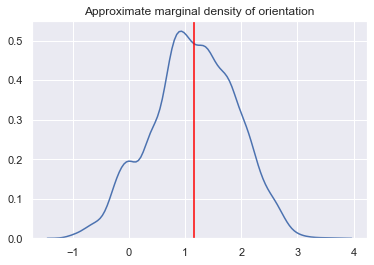

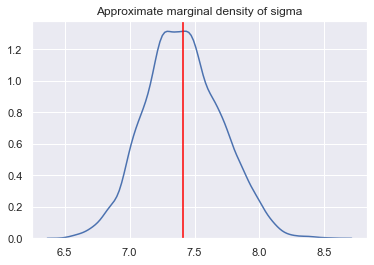

============ Fidelity summary ==================
 the mean square error is :  55.13701007113925
 MSE test is :  53.2386895452004
 PVE is  :  0.6717090799065266
 F   is  :  82.74095578518136
 p value :  1.1102230246251565e-16
 AIC is  :  2261.8660480669387
 BIC is  :  2296.030567823827
 AICc is :  2262.4303113898227


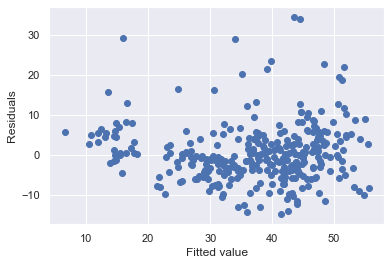

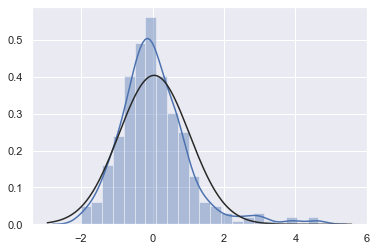

<Figure size 432x288 with 0 Axes>

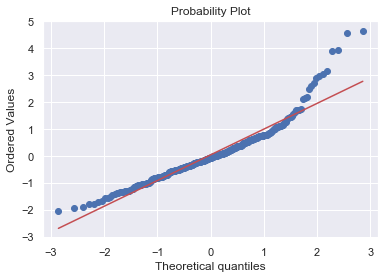

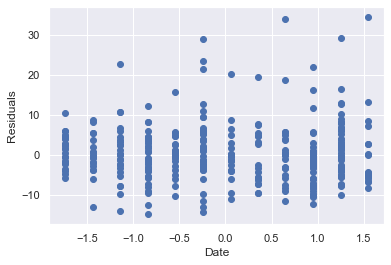

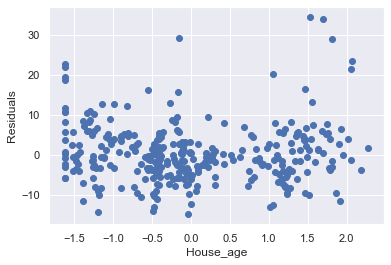

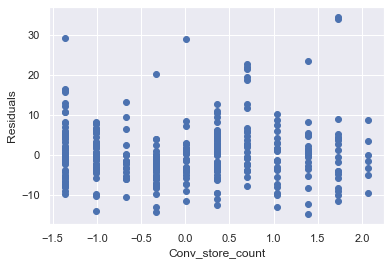

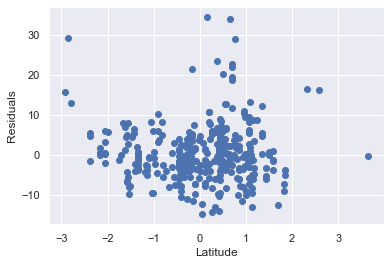

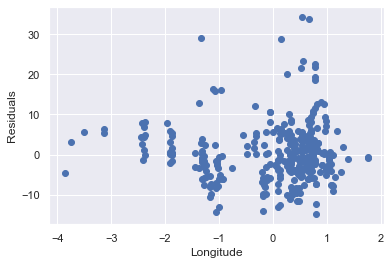

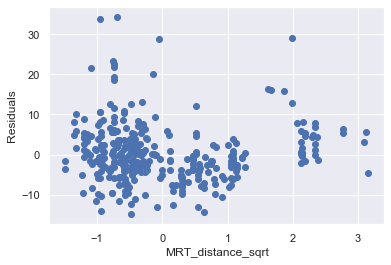

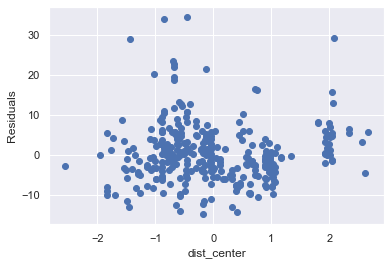

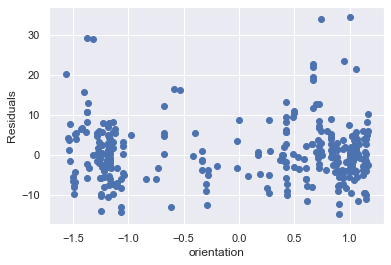

In [8]:
X_names = ['intercept'] + Names + ['sigma']
X = (data_no_outlier[X_names[1:-1]].dropna()).to_numpy()
Model_gaus = Bayesian_framework(len(X_names)-2,X_names,X,Y)
proba_set =  Gaussian_model_np(Model_gaus)

# Define the model
Model_gaus.set_log_joint_prior(proba_set.log_joint_prior)
Model_gaus.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.array( [30,0,0,0,0,0,0,0,0,10] )
step_size = 0.3
num_samples = 10000

M_H_gaus = Metropolis_hastings(Model_gaus,init ,step_size,num_samples)

M_H_gaus.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H_gaus.compute_statistic(burn_in)
M_H_gaus.summary()
tool_gaus = Vizualisation_tool(Model_gaus,M_H_gaus)
tool_gaus.trace_visualization()
tool_gaus.autocorrelation_visualization()
tool_gaus.marginal_visualization()    
tool_gaus.fidelity()
tool_gaus.diagnostics()


####  Using Laplace prior 

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:45<00:00, 217.82it/s]


Acceptance rate :  0.3616
                 features  Coeff   std                CI    2.5   25.0   50.0  \
0               intercept  36.88  0.39  [36.103, 37.666]  36.09  36.63  36.89   
1                    Date   0.69  0.49   [-0.293, 1.669]  -0.04   0.33   0.61   
2               House_age  -2.62  0.36  [-3.331, -1.904]  -3.31  -2.86  -2.63   
3        Conv_store_count   1.92  0.76    [0.391, 3.446]   0.28   1.43   1.93   
4                Latitude   1.53  0.56    [0.406, 2.655]   0.39   1.14   1.52   
5               Longitude   0.05  0.33   [-0.609, 0.703]  -0.66  -0.14   0.04   
6       MRT_distance_sqrt  -5.72  0.93  [-7.582, -3.854]  -7.32  -6.42  -5.82   
7             dist_center  -0.74  0.50   [-1.744, 0.268]  -1.68  -1.13  -0.73   
8             orientation   0.20  0.35   [-0.498, 0.898]  -0.45  -0.02   0.17   
9                Date_sqr   0.24  0.33   [-0.410, 0.895]  -0.23   0.02   0.16   
10          House_age_sqr   0.05  0.18   [-0.298, 0.403]  -0.28  -0.05   0.03   
11

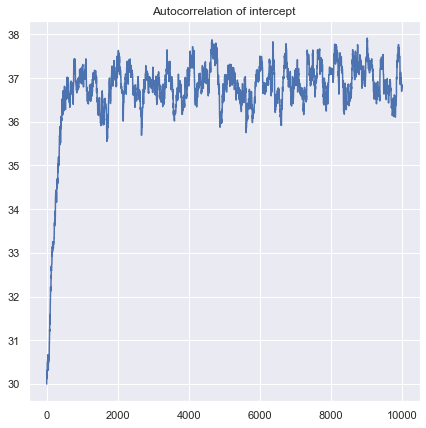

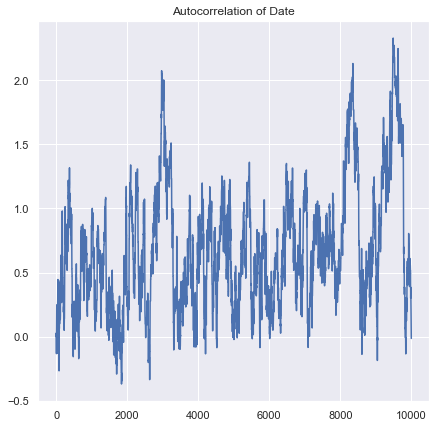

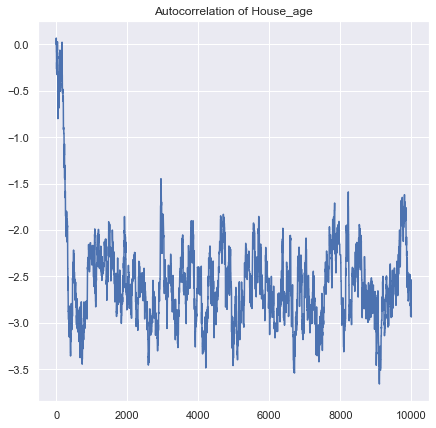

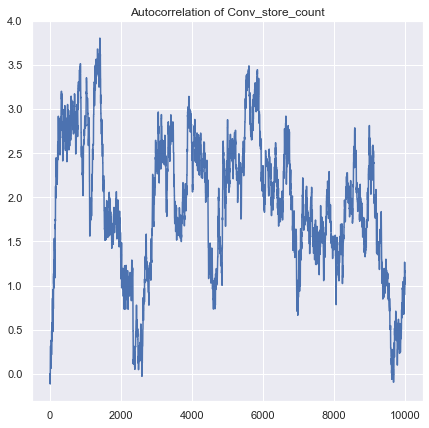

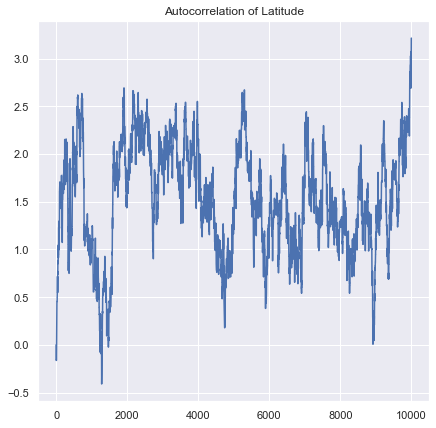

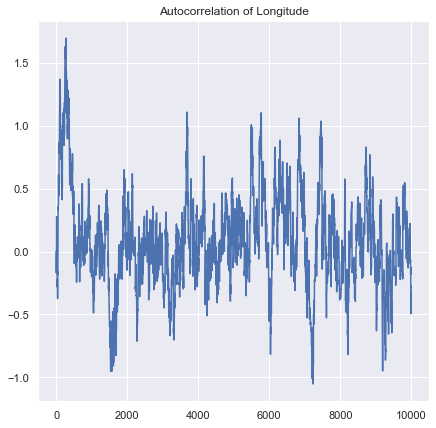

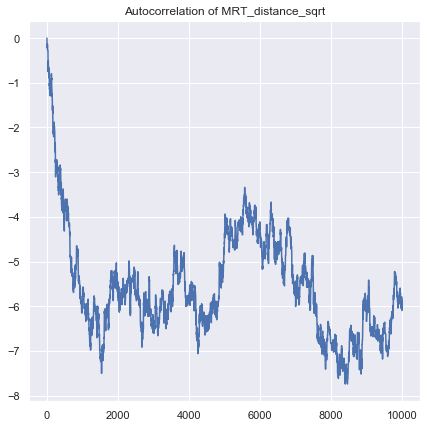

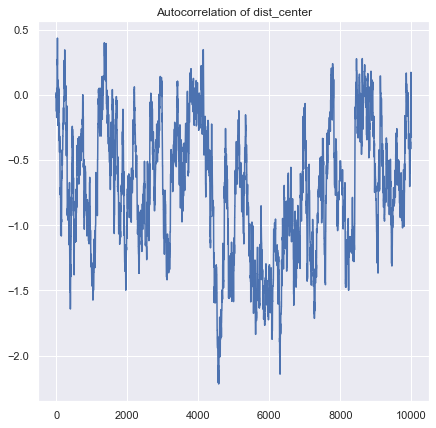

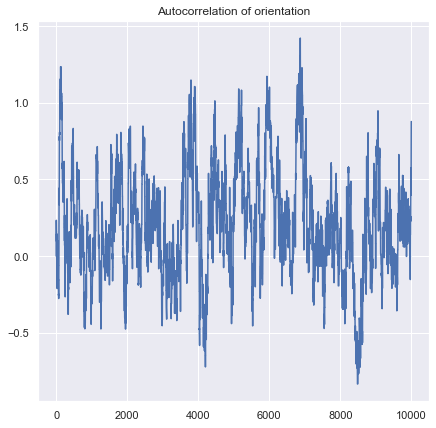

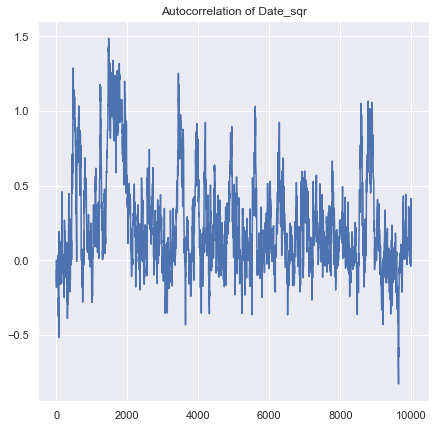

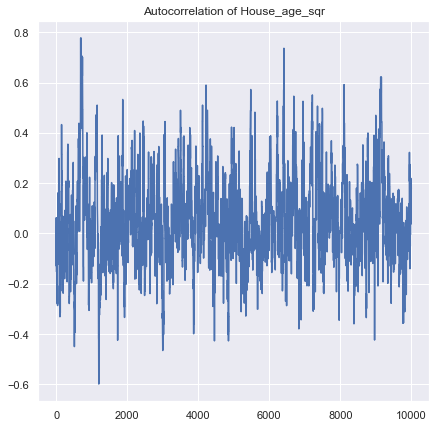

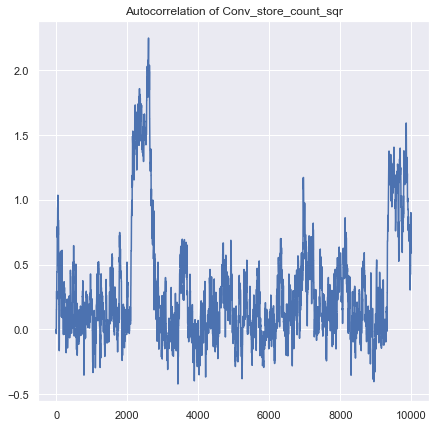

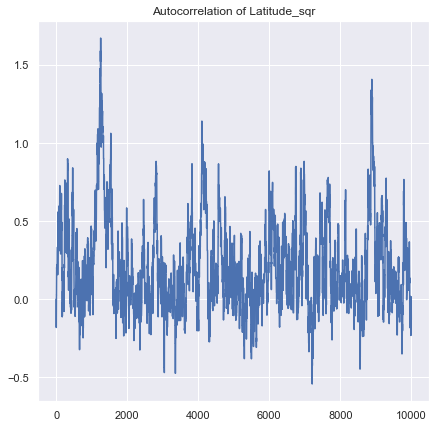

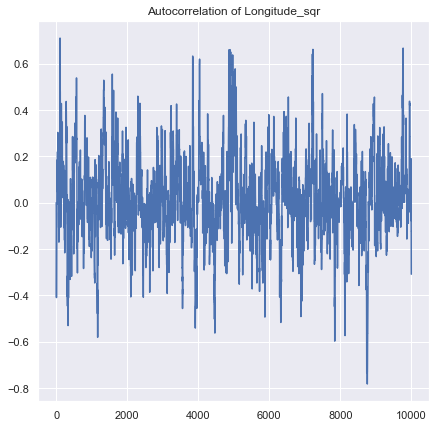

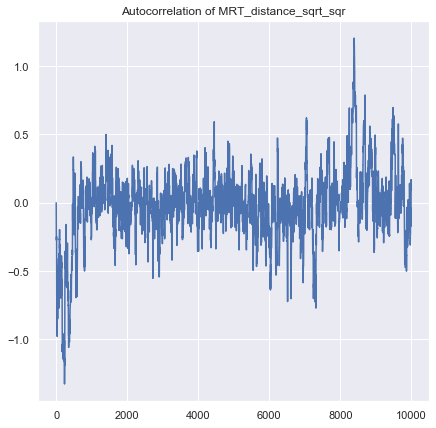

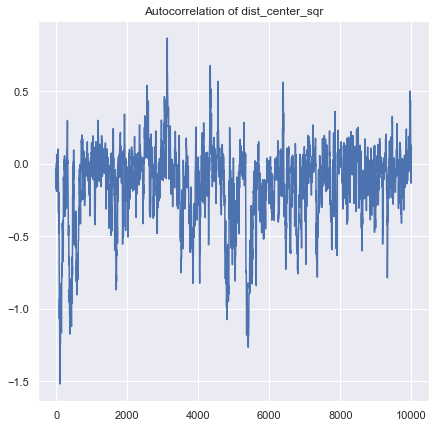

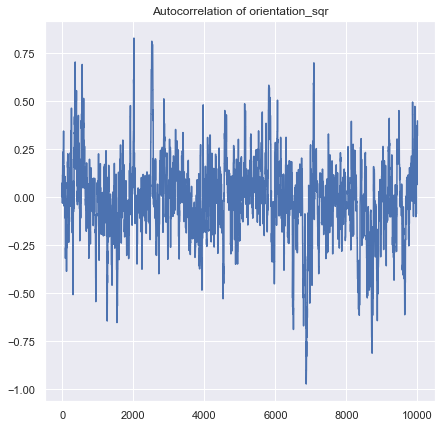

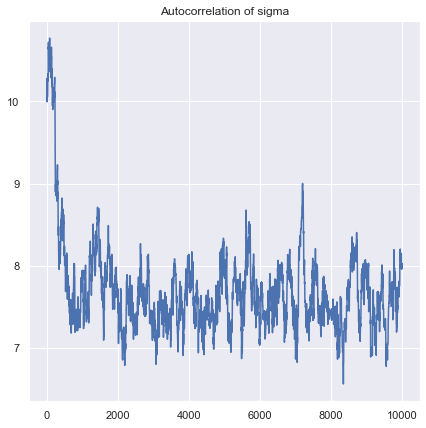

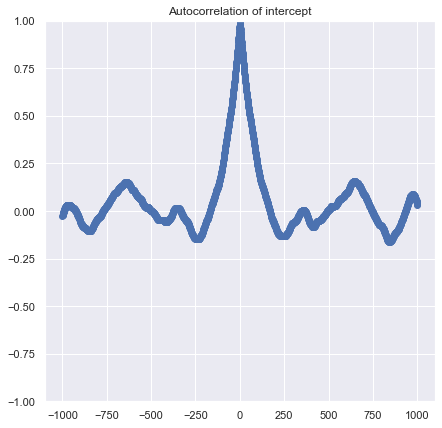

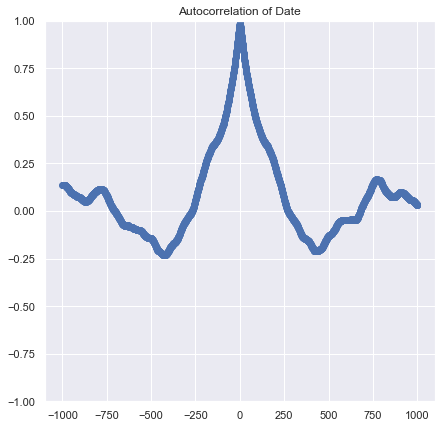

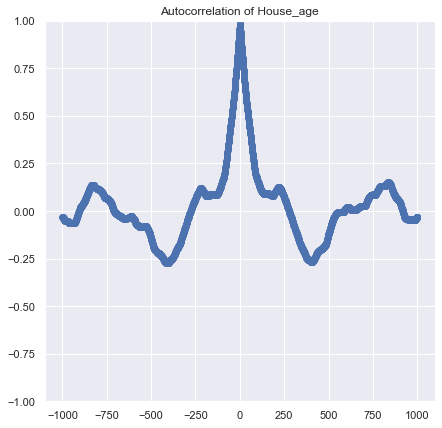

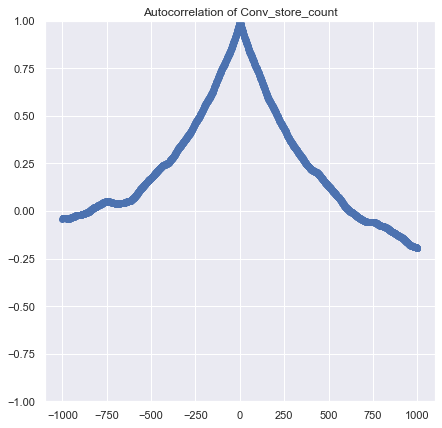

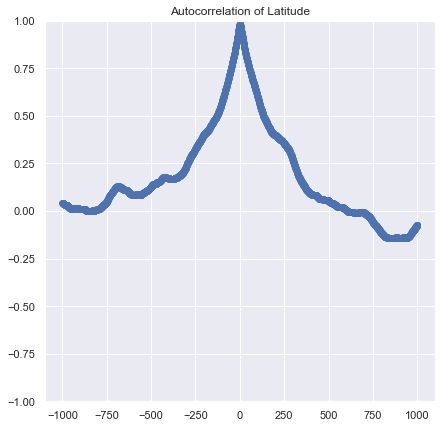

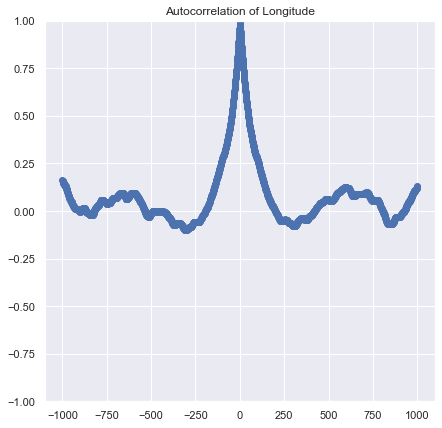

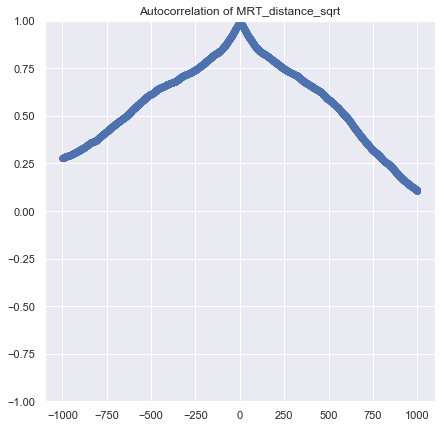

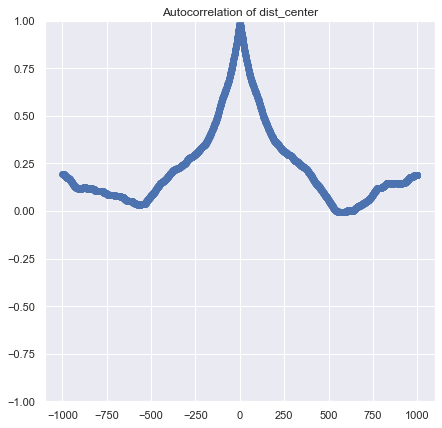

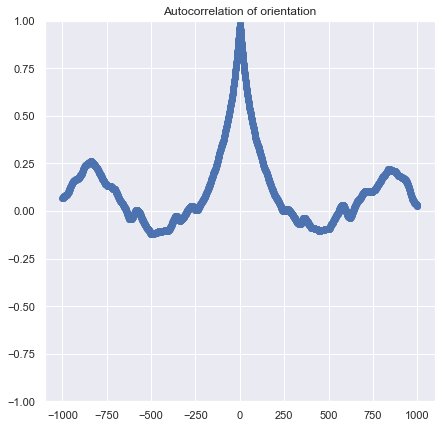

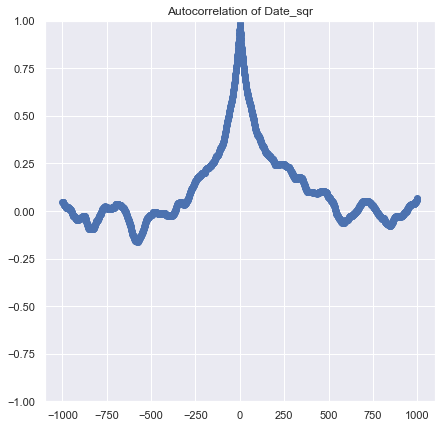

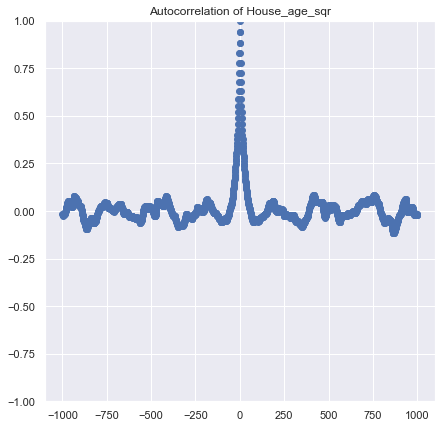

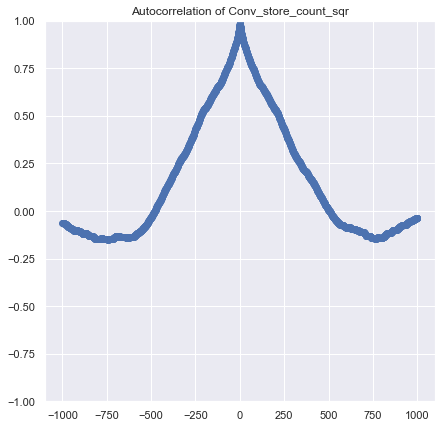

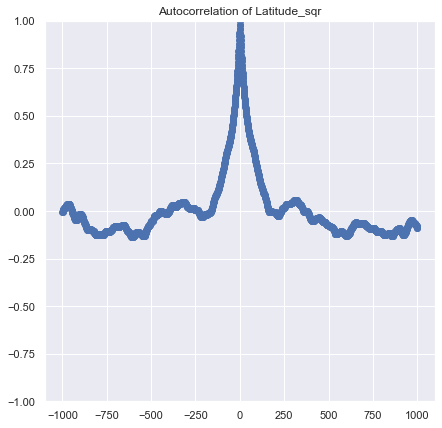

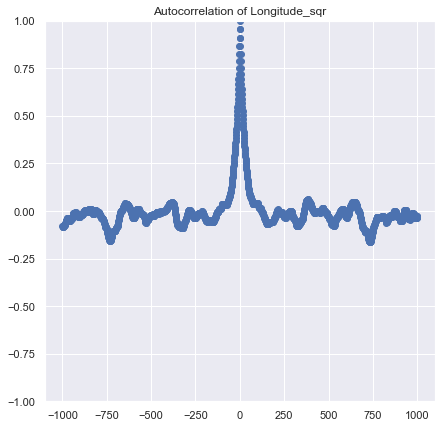

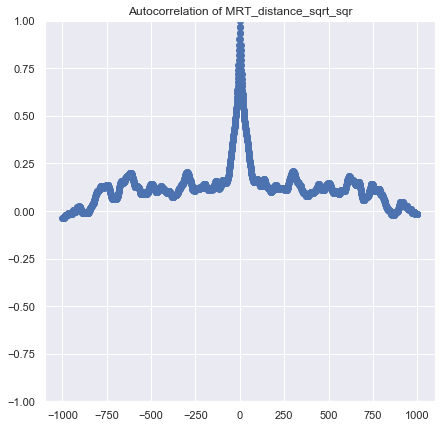

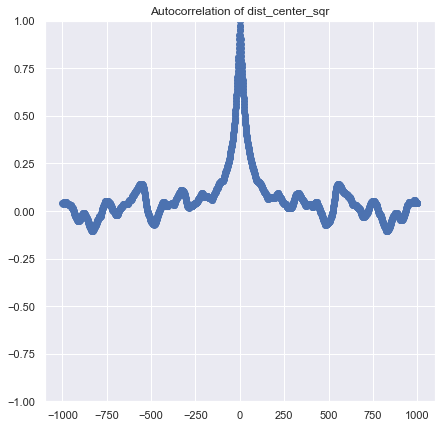

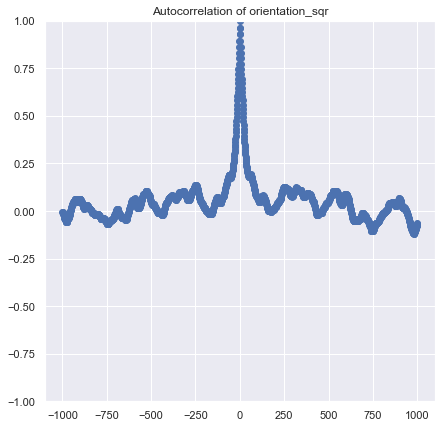

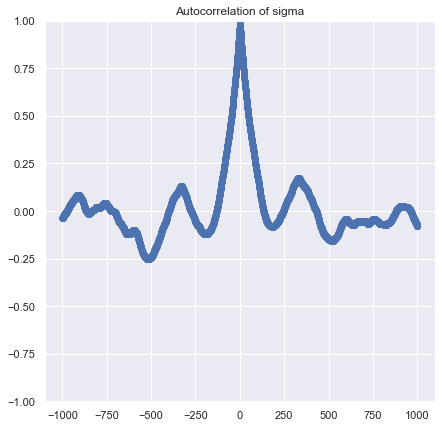

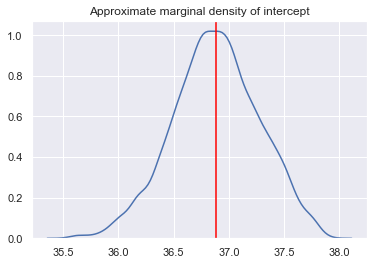

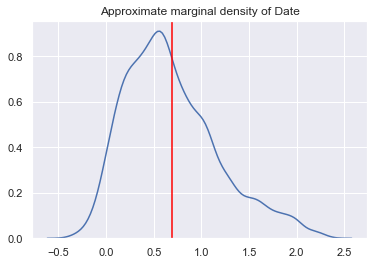

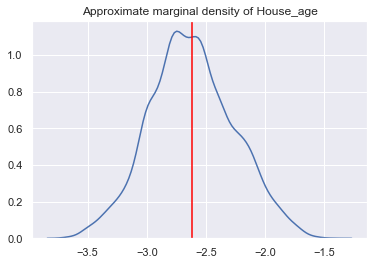

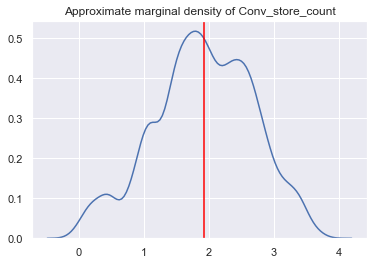

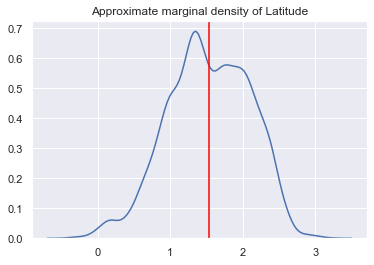

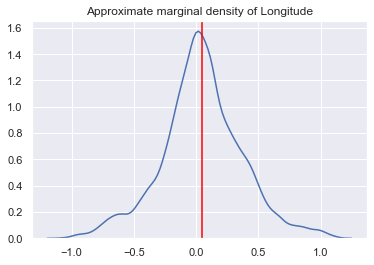

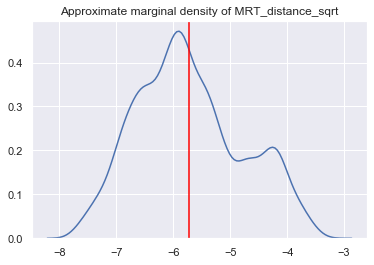

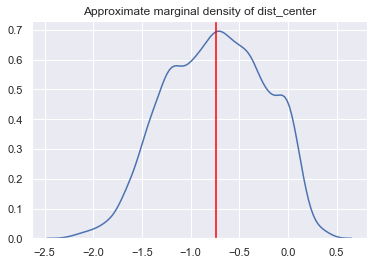

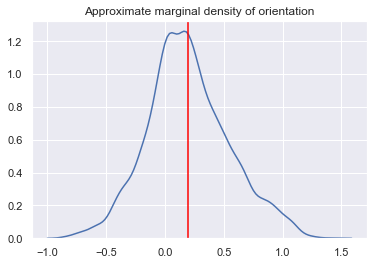

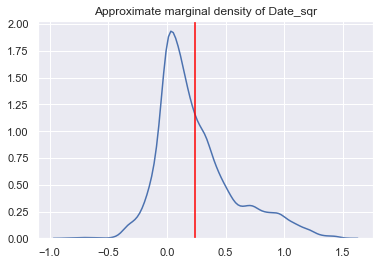

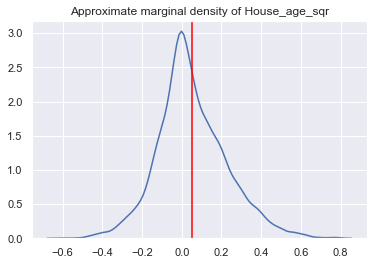

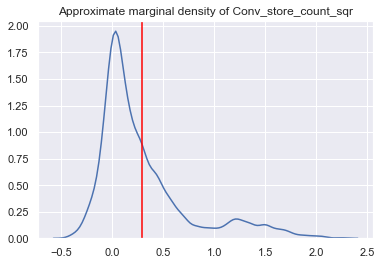

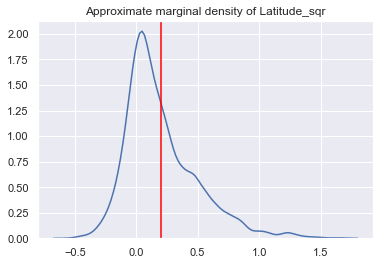

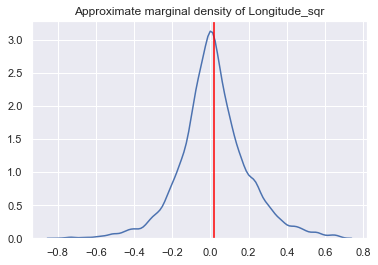

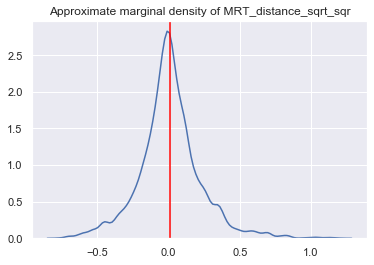

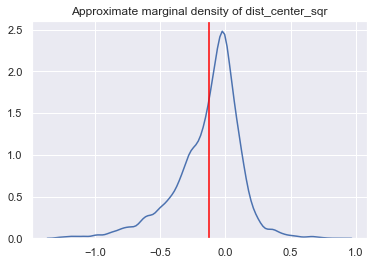

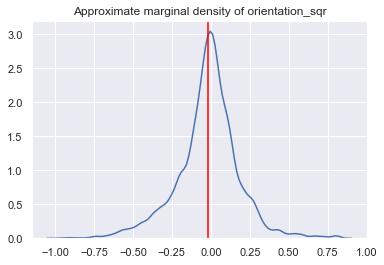

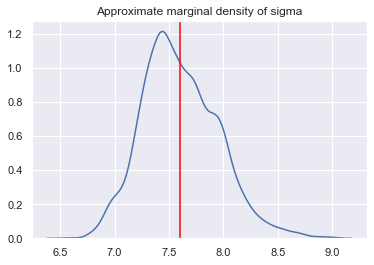

============ Fidelity summary ==================
 the mean square error is :  58.6990417732051
 MSE test is :  61.39162783979835
 PVE is  :  0.5771181659826956
 F   is  :  33.38768163429563
 p value :  1.1102230246251565e-16
 AIC is  :  2290.2678659126873
 BIC is  :  2354.8008476756986
 AICc is :  2292.2357115718514


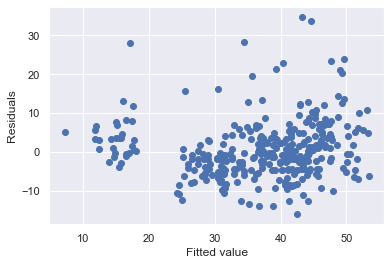

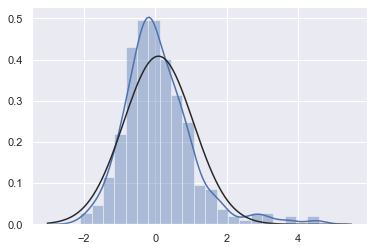

<Figure size 432x288 with 0 Axes>

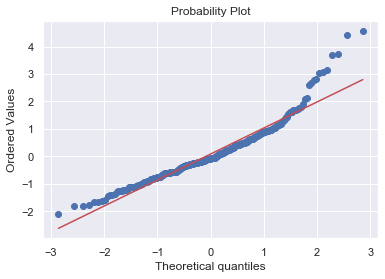

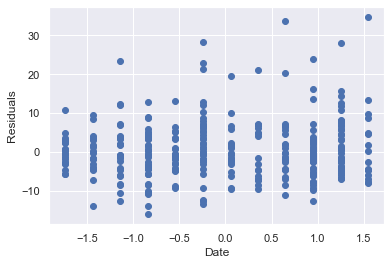

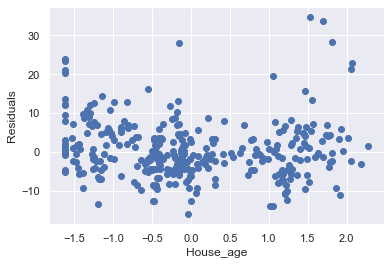

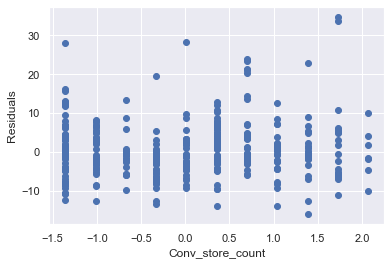

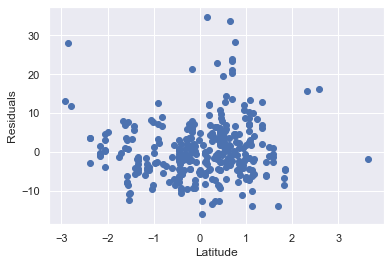

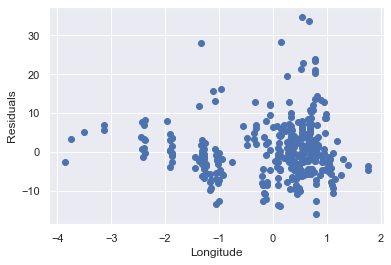

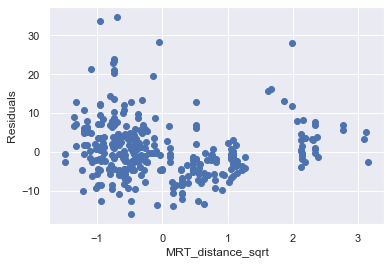

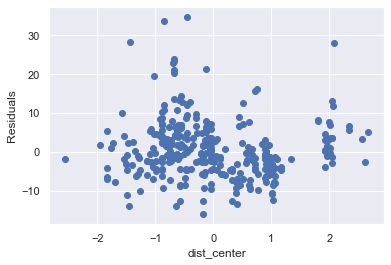

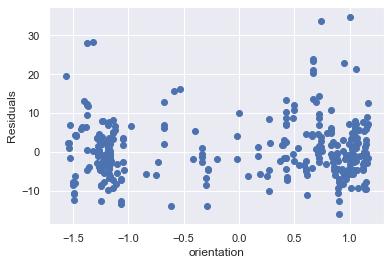

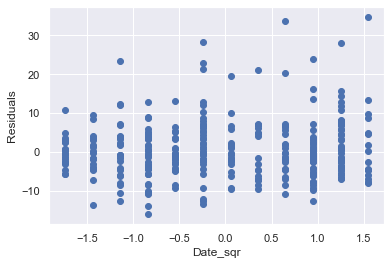

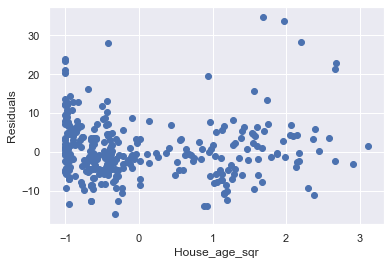

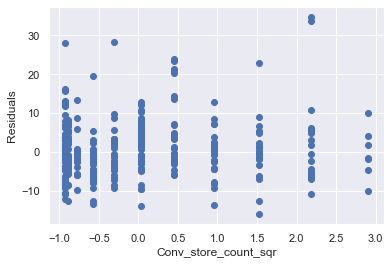

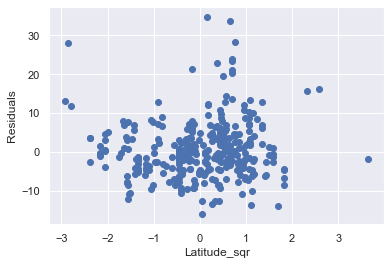

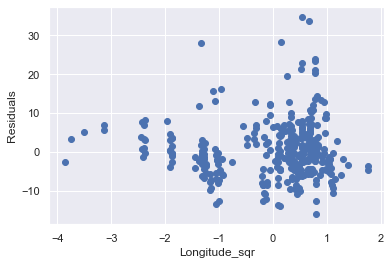

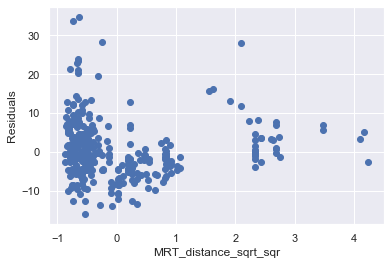

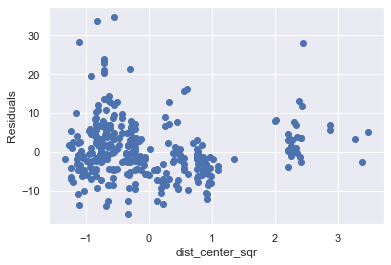

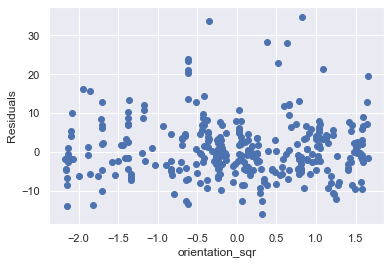

In [7]:
X_names = ['intercept'] + Names_tot + ['sigma'] 
X = (data_no_outlier[X_names[1:-1]].dropna()).to_numpy()
Model = Bayesian_framework(len(X_names)-2,X_names,X,Y)
proba_set = Gaussian_model_laplace_prior(Model, nb_quad_term= 8 )

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros( 18 )
init[0] = 30
init[-1] = 10
step_size = 0.1
num_samples = 10000

M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

M_H.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H.compute_statistic(burn_in)
M_H.summary()
tool = Vizualisation_tool(Model,M_H)
tool.trace_visualization()
tool.autocorrelation_visualization()
tool.marginal_visualization()    
tool.fidelity()
tool.diagnostics()



It seems that  polynomial predictors of order 2 are irelevant

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 215.17it/s]


Acceptance rate :  0.2224
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.17  0.40  [36.375, 37.966]  36.37  36.90  37.18   
1               Date   1.05  0.40    [0.239, 1.851]   0.25   0.78   1.04   
2          House_age  -2.66  0.41  [-3.468, -1.846]  -3.46  -2.93  -2.65   
3   Conv_store_count   1.93  0.58    [0.768, 3.091]   0.81   1.51   1.92   
4           Latitude   1.49  0.67    [0.143, 2.831]   0.22   1.01   1.46   
5          Longitude  -0.06  0.37   [-0.788, 0.673]  -0.88  -0.25  -0.04   
6  MRT_distance_sqrt  -5.81  0.80  [-7.409, -4.207]  -7.36  -6.34  -5.86   
7        dist_center  -1.41  0.89   [-3.186, 0.366]  -3.33  -2.00  -1.29   
8        orientation   0.24  0.37   [-0.496, 0.983]  -0.37  -0.00   0.19   
9              sigma   7.51  0.29    [6.930, 8.098]   6.95   7.32   7.51   

    75.0   97.5  
0  37.45  37.94  
1   1.31   1.85  
2  -2.38  -1.83  
3   2.34   3.11  
4   1.96   2.89  
5   0.14   0.69  
6  -5.28  -

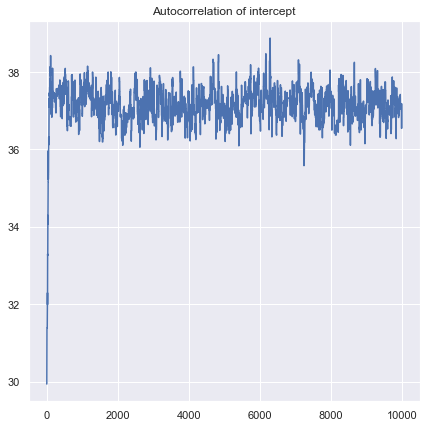

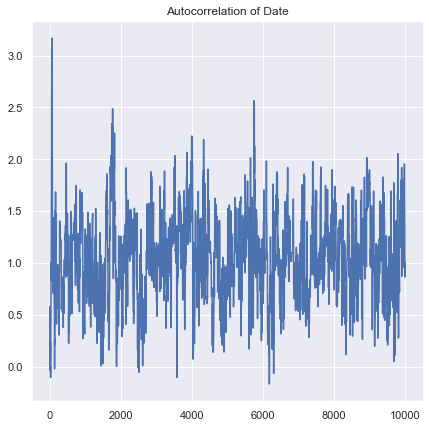

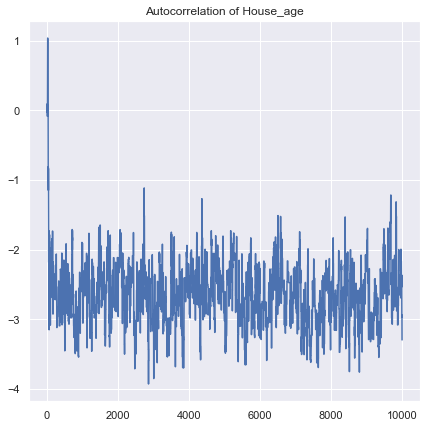

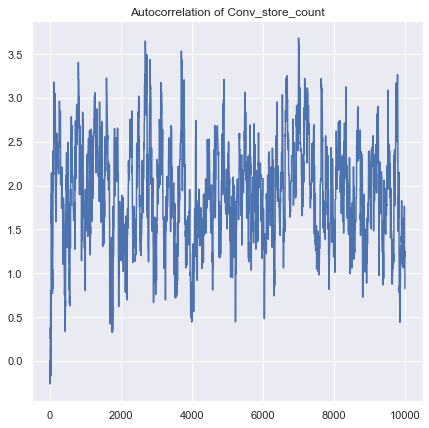

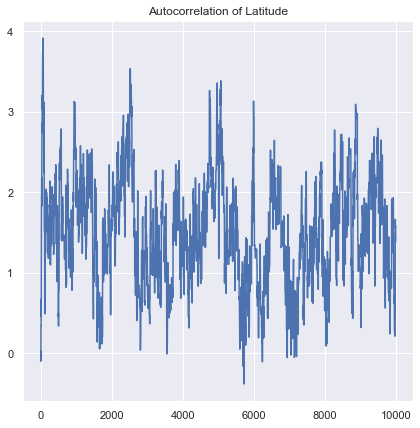

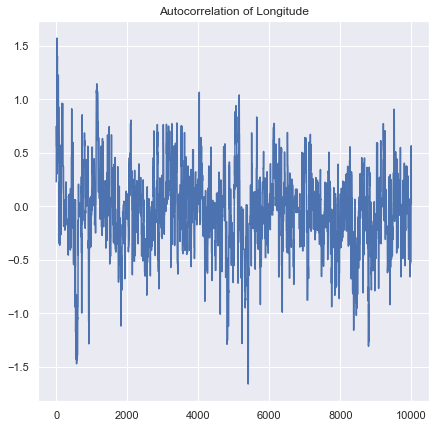

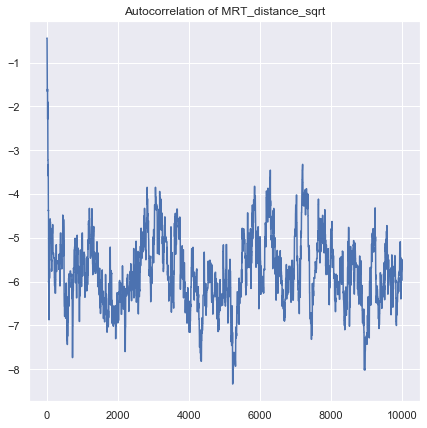

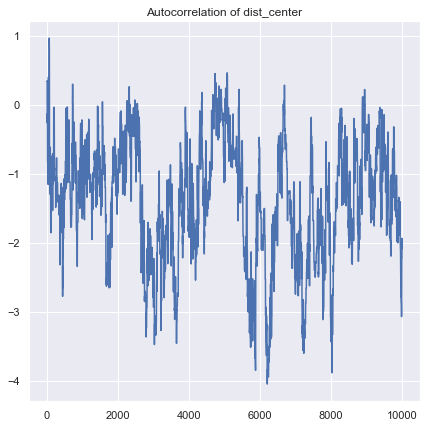

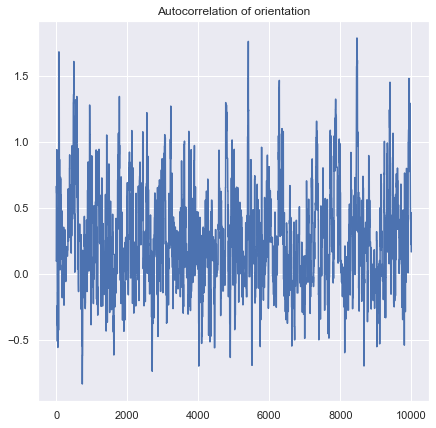

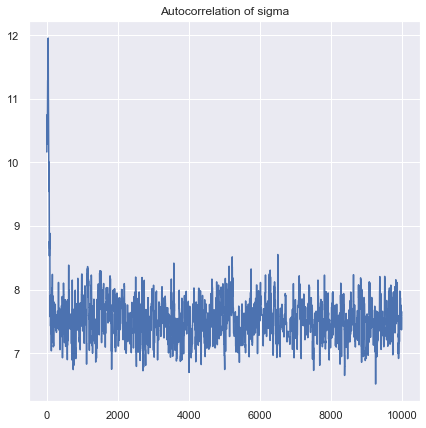

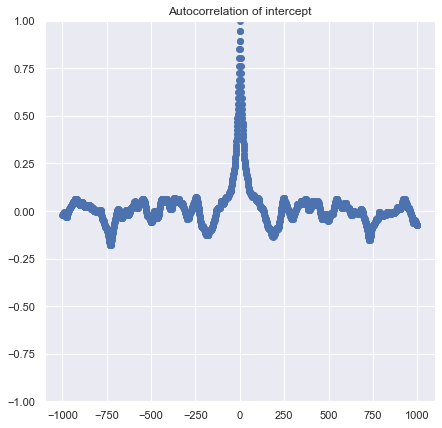

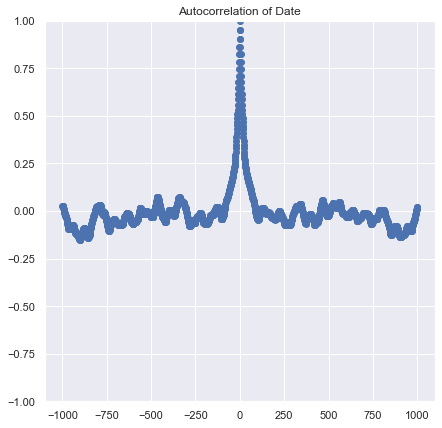

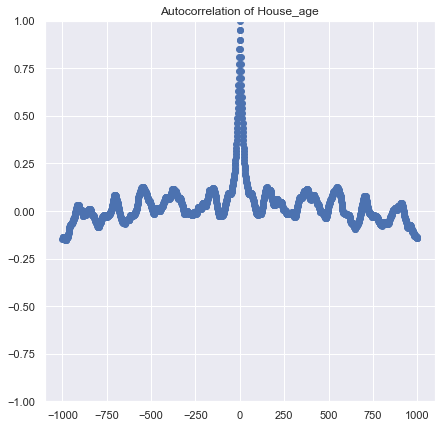

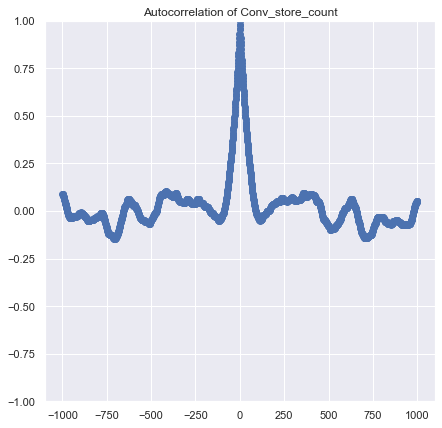

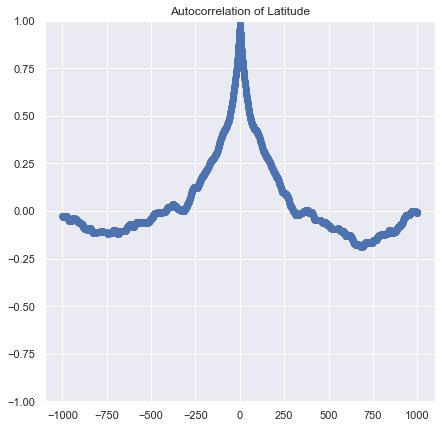

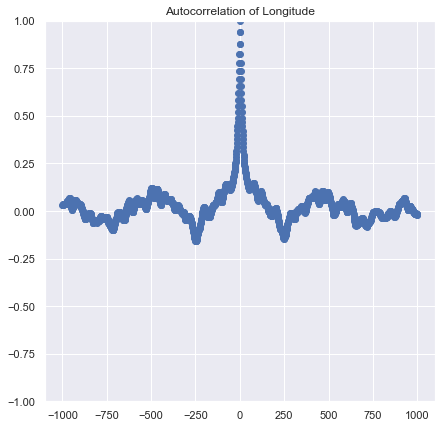

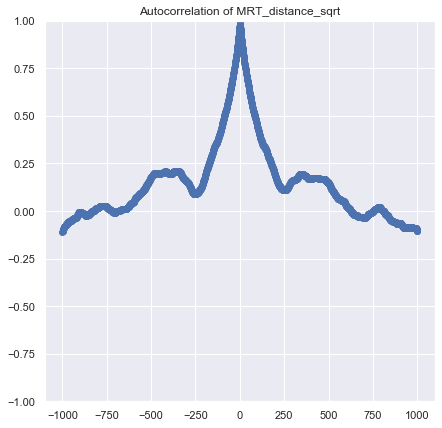

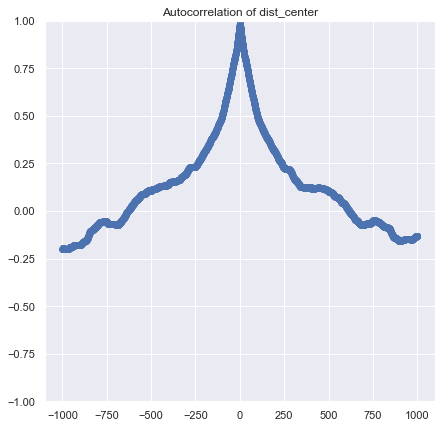

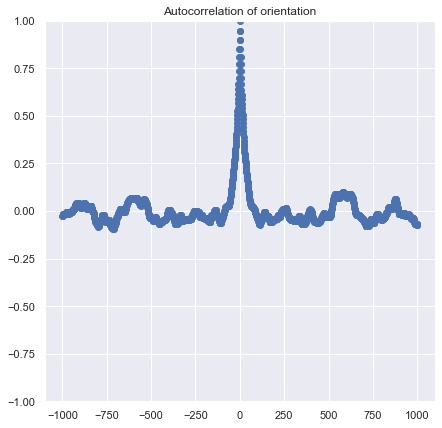

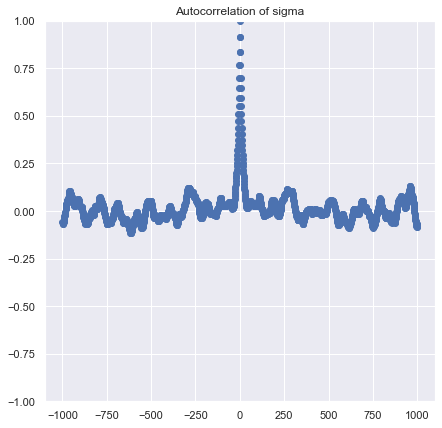

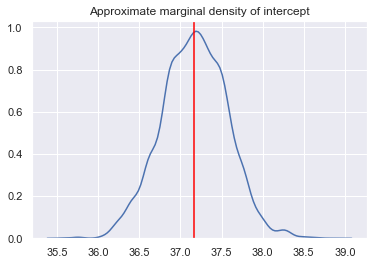

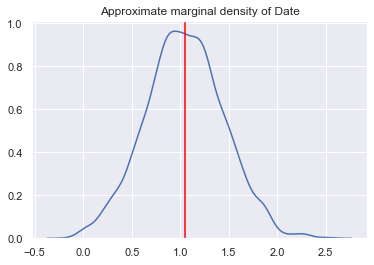

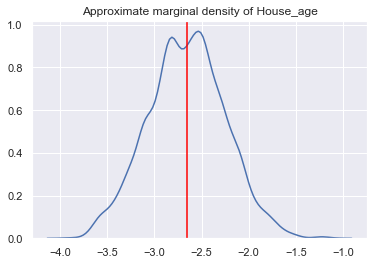

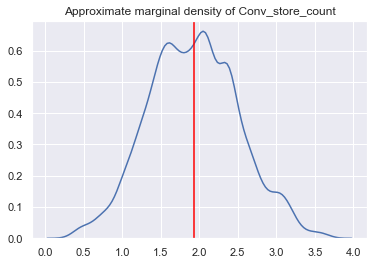

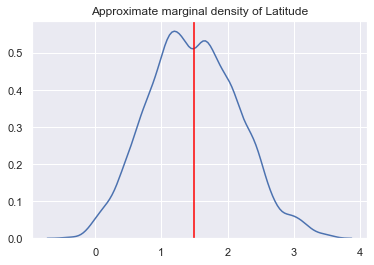

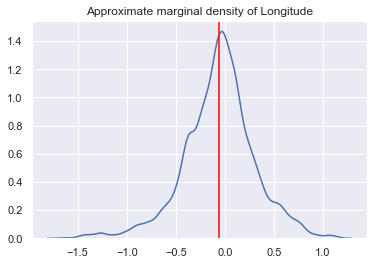

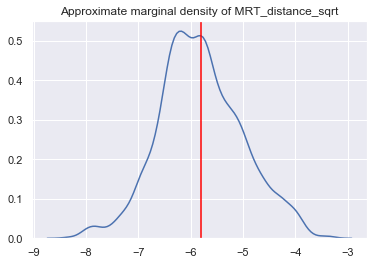

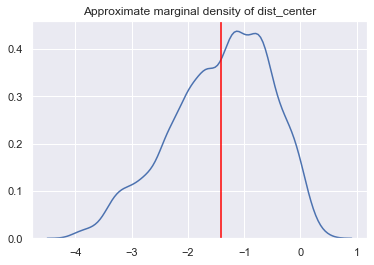

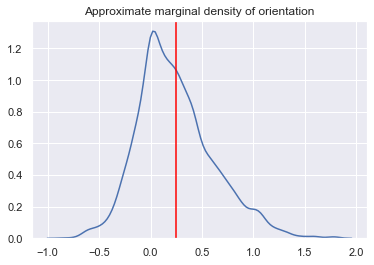

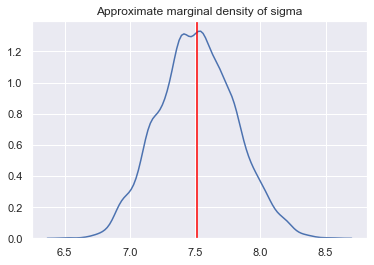

============ Fidelity summary ==================
 the mean square error is :  56.661870070621035
 MSE test is :  54.710331556424386
 PVE is  :  0.5920118129835646
 F   is  :  70.96137057183309
 p value :  1.1102230246251565e-16
 AIC is  :  2270.837971450648
 BIC is  :  2305.0024912075364
 AICc is :  2271.402234773532


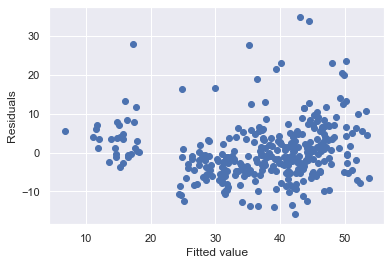

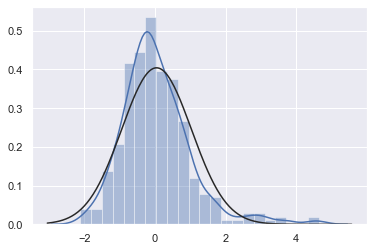

<Figure size 432x288 with 0 Axes>

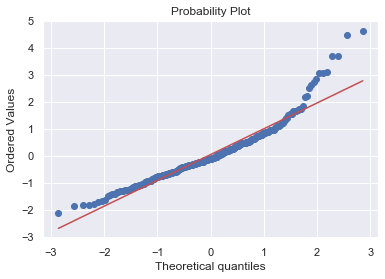

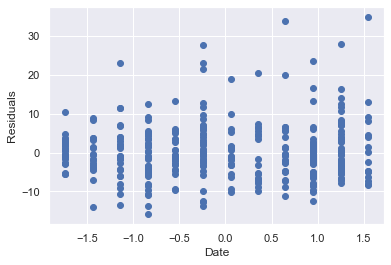

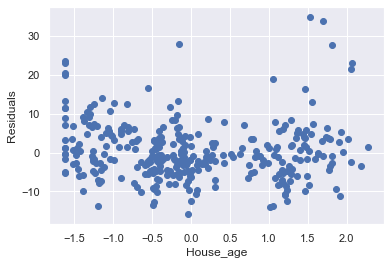

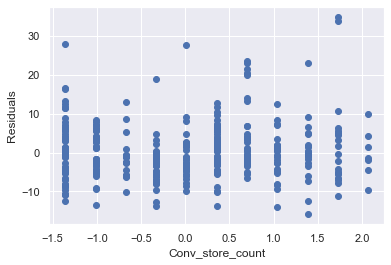

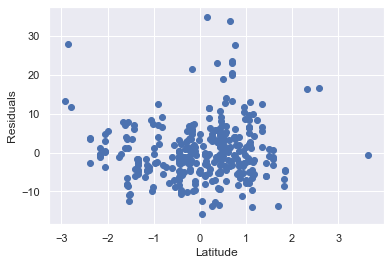

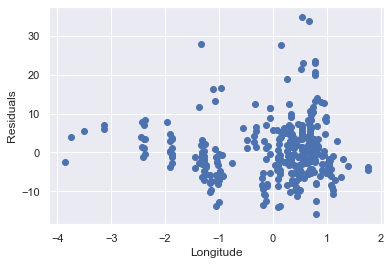

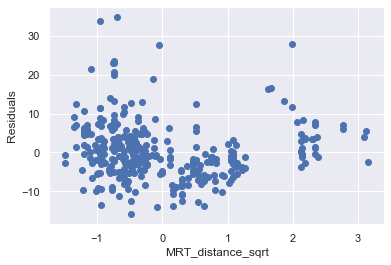

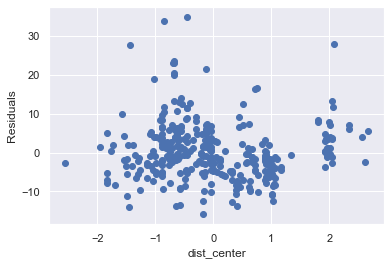

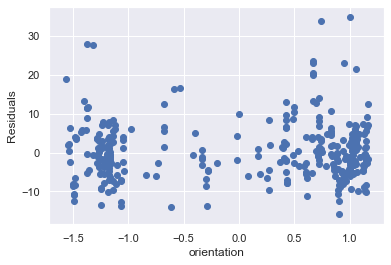

In [11]:
X_names = ['intercept'] + Names + ['sigma'] 
X = (data_no_outlier[X_names[1:-1]].dropna()).to_numpy()
Model = Bayesian_framework(len(X_names)-2,X_names,X,Y)
proba_set = Gaussian_model_laplace_prior(Model )

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros( 10 )
init[0] = 30
init[-1] = 10
step_size = 0.3
num_samples = 10000

M_H = Metropolis_hastings(Model,init ,step_size,num_samples)

M_H.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H.compute_statistic(burn_in)
M_H.summary()
tool = Vizualisation_tool(Model,M_H)
tool.trace_visualization()
tool.autocorrelation_visualization()
tool.marginal_visualization()    
tool.fidelity()
tool.diagnostics()

 - Note that the marginal distribution of **dist_center** is not symetric and seems to lead to zero
 - We can see that **Longitude** and **orientation** seems to be irrevlant since the mass are centered around zero

In [29]:
X_names_reduce = [ 'intercept', 'Date','House_age','Conv_store_count','Latitude', 'MRT_distance_sqrt' ,'dist_center','sigma' ]

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [01:09<00:00, 215.42it/s]


Acceptance rate :  0.31153333333333333
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.29  0.41  [36.476, 38.100]  36.50  37.00  37.29   
1               Date   1.53  0.43    [0.674, 2.376]   0.69   1.25   1.52   
2          House_age  -3.02  0.41  [-3.840, -2.197]  -3.84  -3.31  -3.00   
3   Conv_store_count   2.27  0.55    [1.171, 3.360]   1.26   1.89   2.26   
4           Latitude   1.87  0.76    [0.351, 3.393]   0.41   1.36   1.86   
5  MRT_distance_sqrt  -6.14  0.79  [-7.727, -4.559]  -7.67  -6.66  -6.16   
6        dist_center  -1.10  1.09   [-3.274, 1.077]  -3.05  -1.90  -1.16   
7              sigma   7.44  0.29    [6.868, 8.016]   6.90   7.25   7.43   

    75.0   97.5  
0  37.57  38.10  
1   1.81   2.37  
2  -2.73  -2.24  
3   2.62   3.41  
4   2.39   3.39  
5  -5.60  -4.63  
6  -0.33   1.14  
7   7.63   8.02  


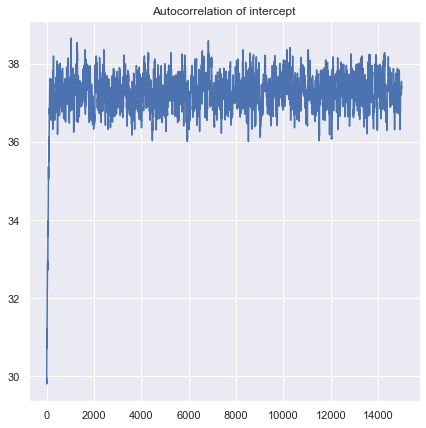

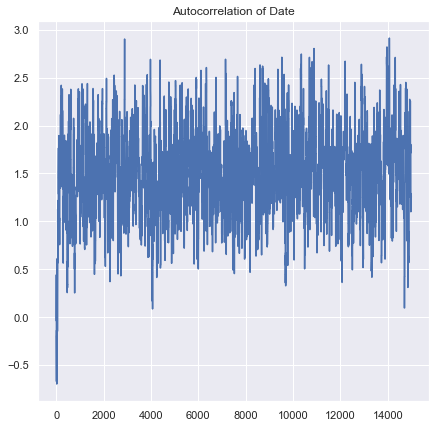

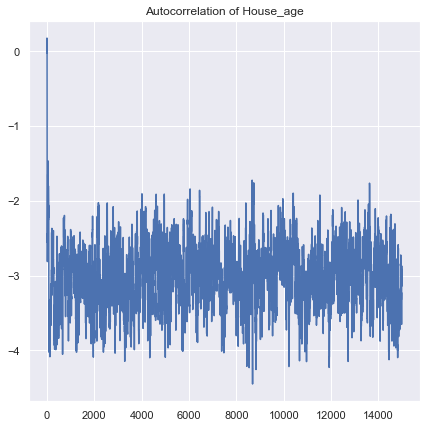

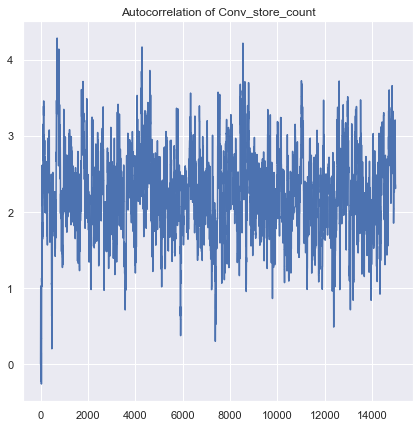

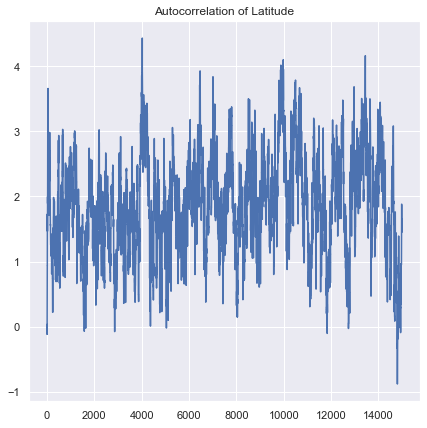

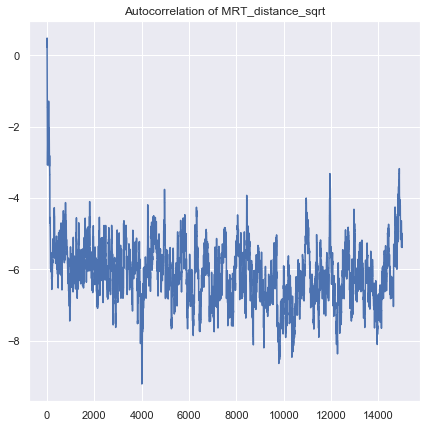

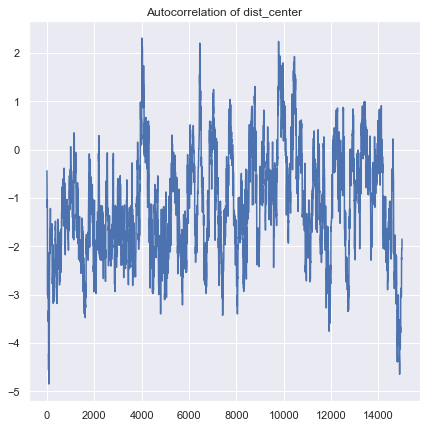

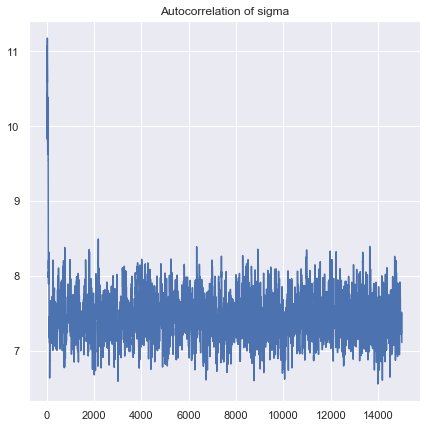

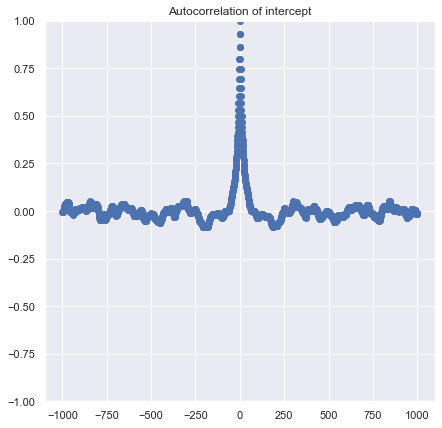

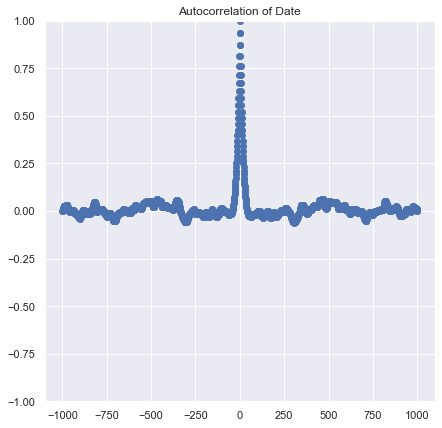

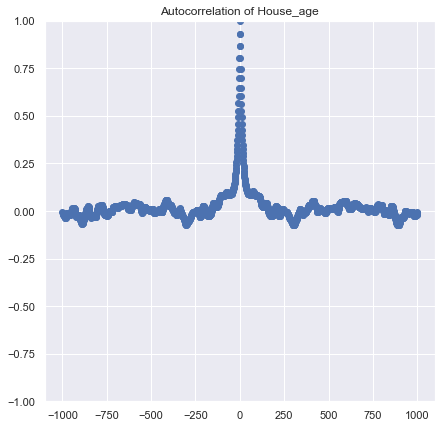

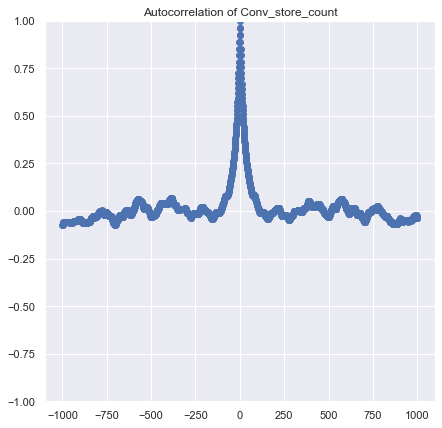

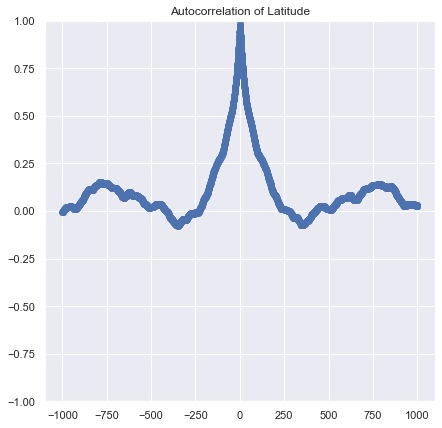

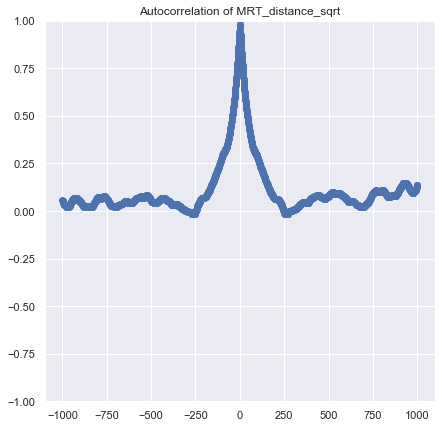

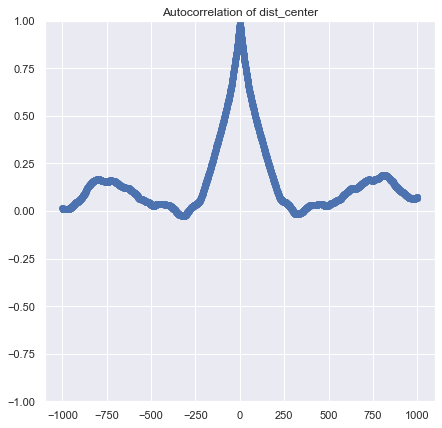

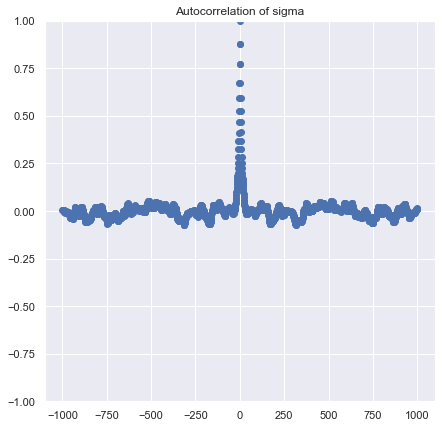

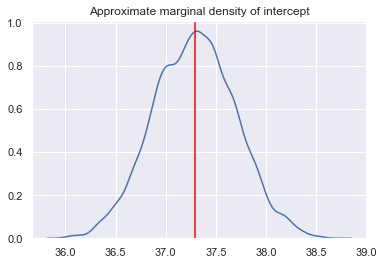

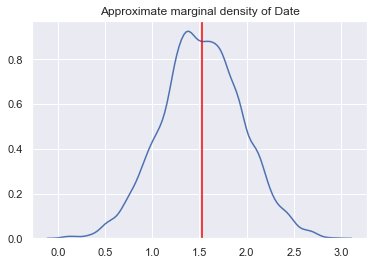

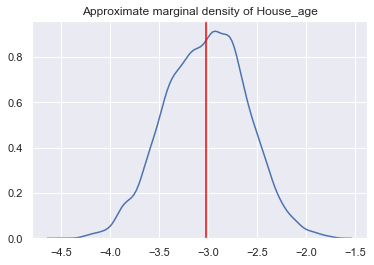

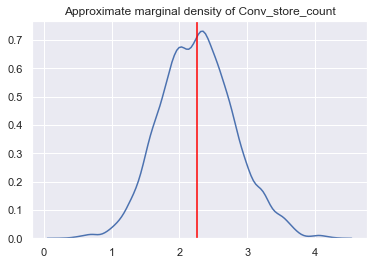

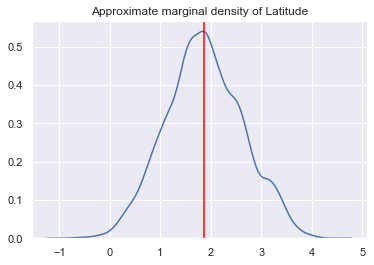

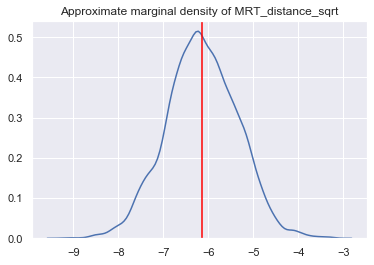

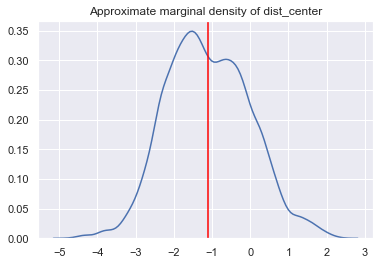

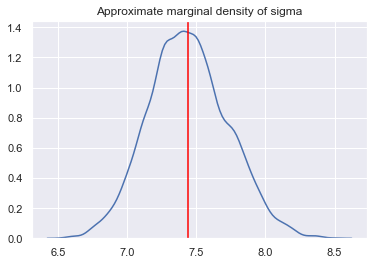

============ Fidelity summary ==================
 the mean square error is :  55.54838267492533
 MSE test is :  51.88249698030486
 PVE is  :  0.6630891990535406
 F   is  :  108.09903024456116
 p value :  1.1102230246251565e-16
 AIC is  :  2262.3184313675506
 BIC is  :  2288.890835622908
 AICc is :  2262.6673410248713


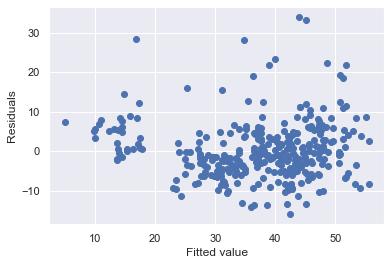

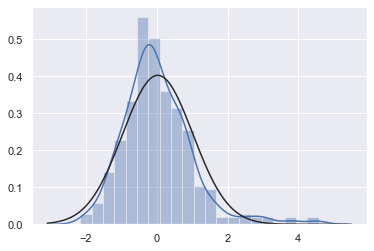

<Figure size 432x288 with 0 Axes>

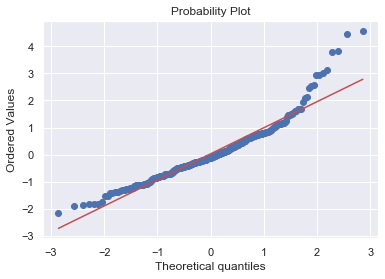

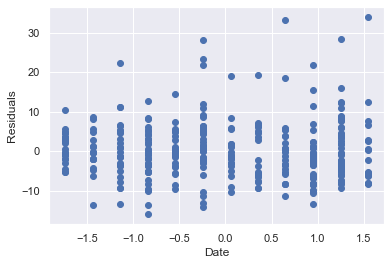

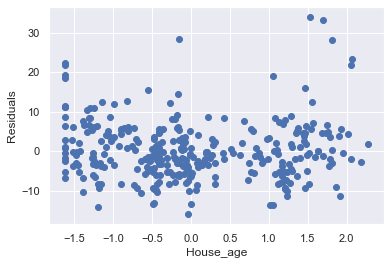

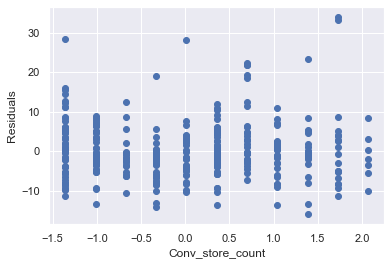

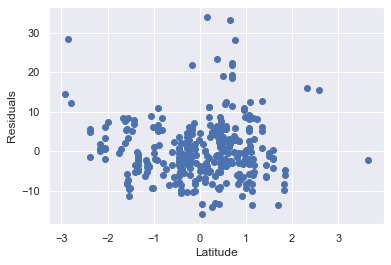

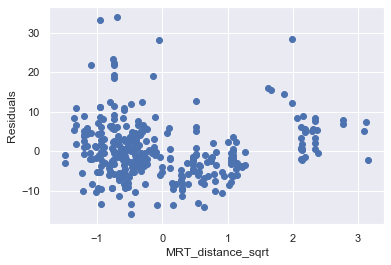

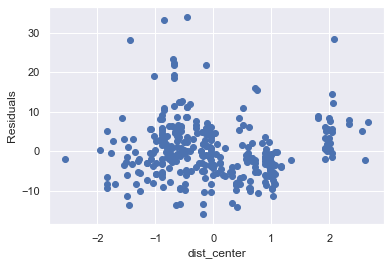

In [31]:
X = (data_no_outlier[X_names_reduce[1:-1]].dropna()).to_numpy()
Model_reduce = Bayesian_framework(len(X_names_reduce)-2,X_names_reduce,X,Y)
proba_set = Gaussian_model_np(Model_reduce)

# Define the model
Model_reduce.set_log_joint_prior(proba_set.log_joint_prior)
Model_reduce.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros( 8 )
init[0] = 30
init[-1] = 10
step_size = 0.3
num_samples = 15000

M_H_reduce = Metropolis_hastings(Model_reduce,init ,step_size,num_samples)

M_H_reduce.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H_reduce.compute_statistic(burn_in)
M_H_reduce.summary()
tool_reduce = Vizualisation_tool(Model_reduce,M_H_reduce)
tool_reduce.trace_visualization()
tool_reduce.autocorrelation_visualization()
tool_reduce.marginal_visualization()    
tool_reduce.fidelity()
tool_reduce.diagnostics()

In [32]:
f , p = F_test_reduce_model(tool_gaus , tool_reduce)
print( " F test , F is :", f," p value is :",p)

 F test , F is : 4.247179035481846  p value is : 0.015119246474426085


We can barely reject the null hypothesis that **orientation** and **longitude** do not contribute to the prediction of the Price per unit

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [01:11<00:00, 210.19it/s]


Acceptance rate :  0.33913333333333334
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.32  0.40  [36.518, 38.117]  36.49  37.06  37.32   
1               Date   1.52  0.43    [0.665, 2.385]   0.72   1.23   1.51   
2          House_age  -2.92  0.41  [-3.746, -2.091]  -3.73  -3.19  -2.93   
3   Conv_store_count   2.44  0.54    [1.363, 3.515]   1.35   2.09   2.44   
4           Latitude   2.43  0.47    [1.500, 3.366]   1.48   2.13   2.45   
5  MRT_distance_sqrt  -6.64  0.57  [-7.782, -5.491]  -7.76  -7.02  -6.63   
6              sigma   7.44  0.28    [6.879, 7.996]   6.90   7.24   7.43   

    75.0   97.5  
0  37.58  38.10  
1   1.81   2.40  
2  -2.65  -2.09  
3   2.80   3.47  
4   2.74   3.33  
5  -6.26  -5.51  
6   7.63   7.99  


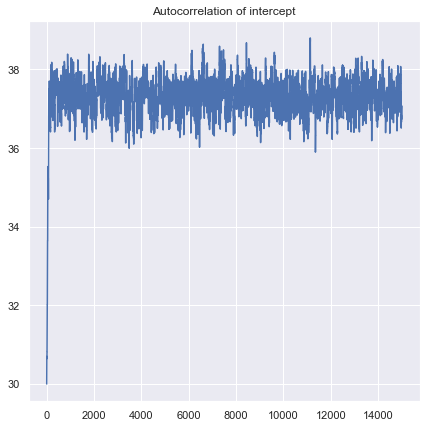

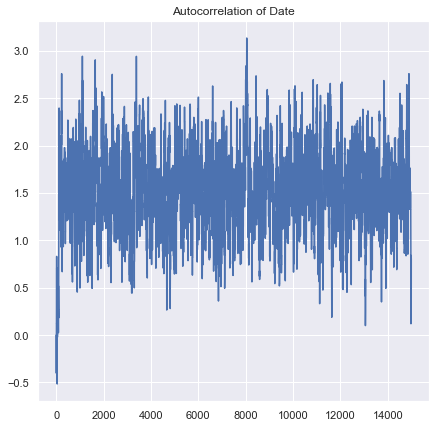

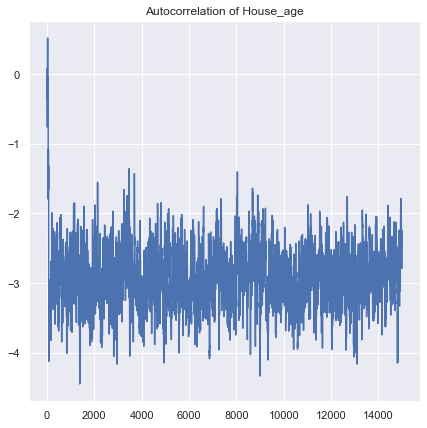

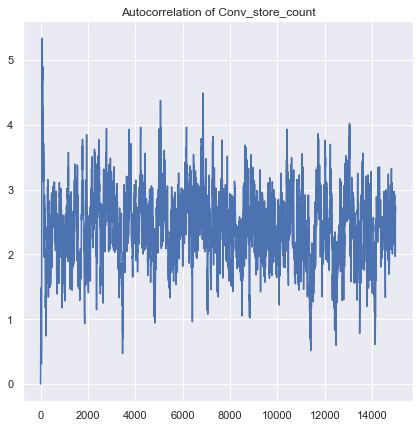

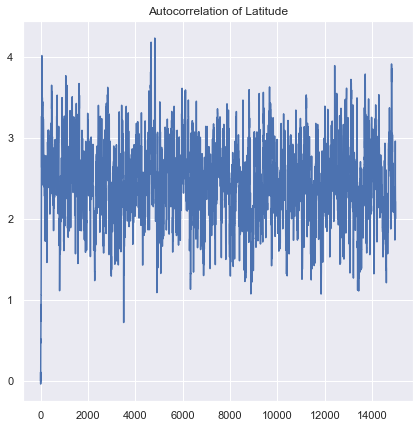

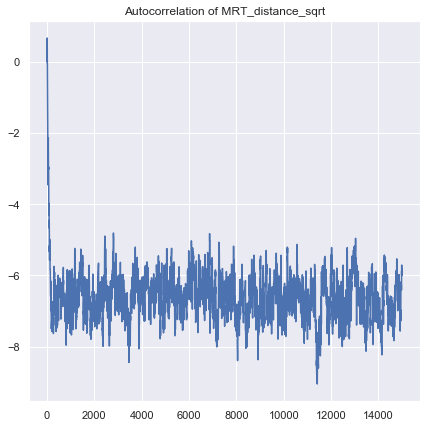

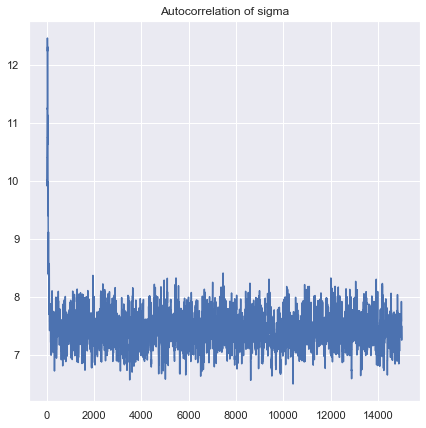

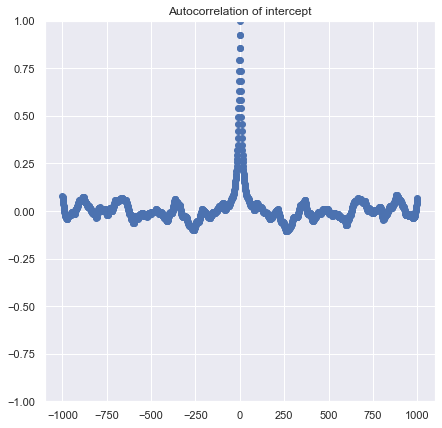

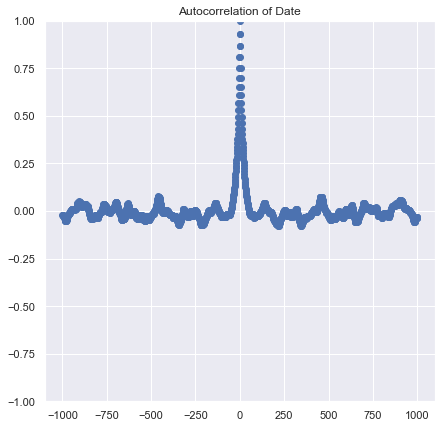

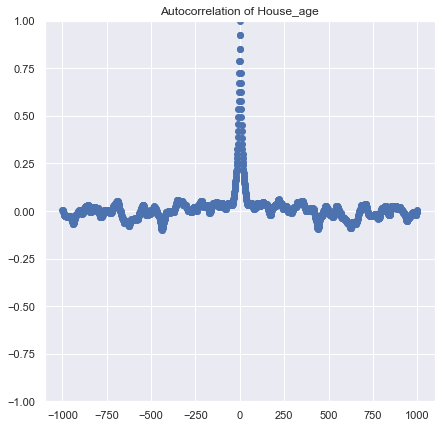

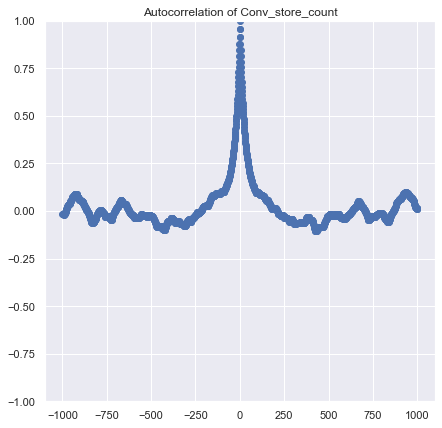

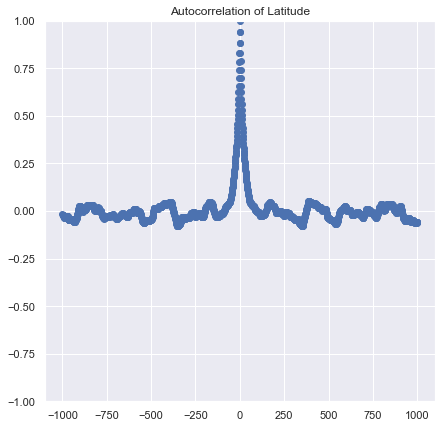

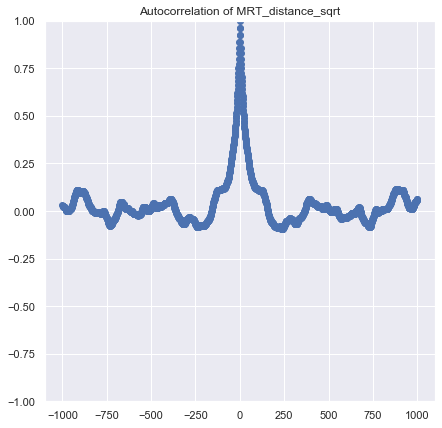

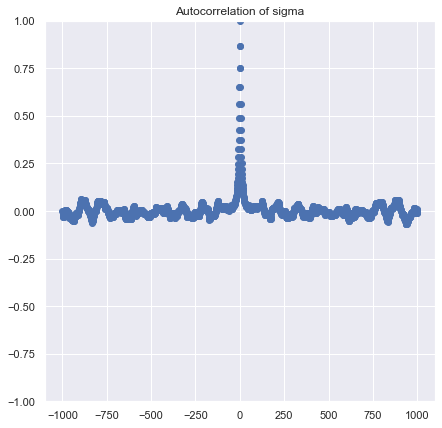

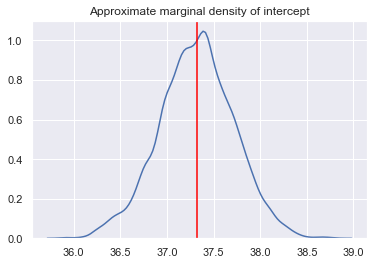

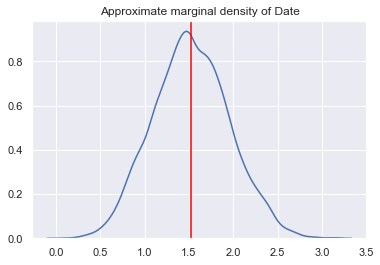

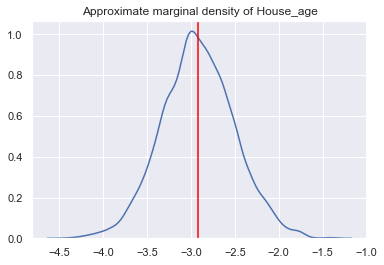

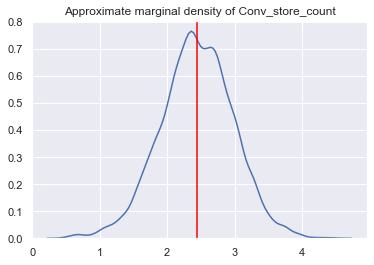

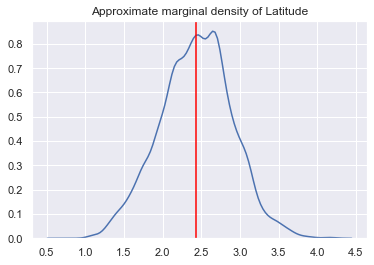

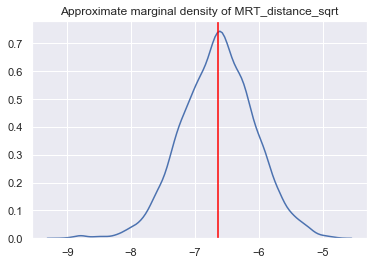

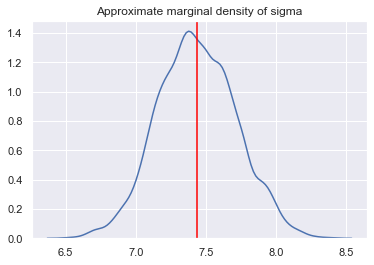

============ Fidelity summary ==================
 the mean square error is :  55.53669682421378
 MSE test is :  50.480922129284096
 PVE is  :  0.6678505334526516
 F   is  :  130.6777777880456
 p value :  1.1102230246251565e-16
 AIC is  :  2261.2477870134057
 BIC is  :  2284.024133517998
 AICc is :  2261.5086565786232


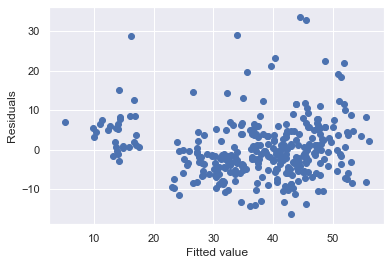

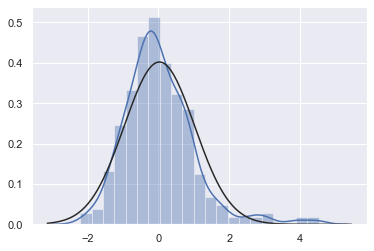

<Figure size 432x288 with 0 Axes>

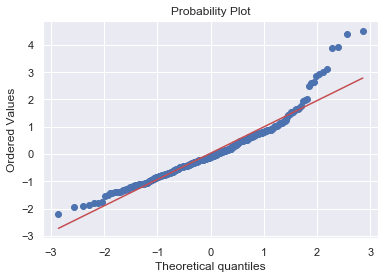

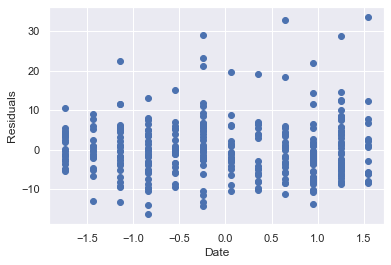

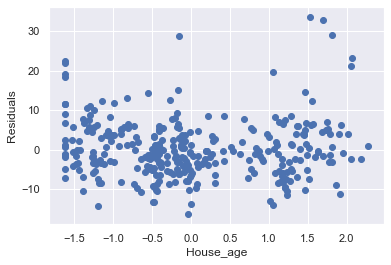

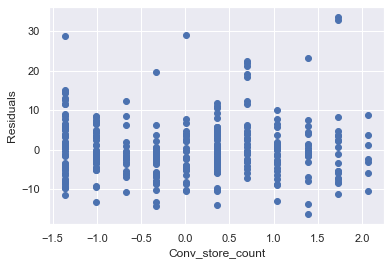

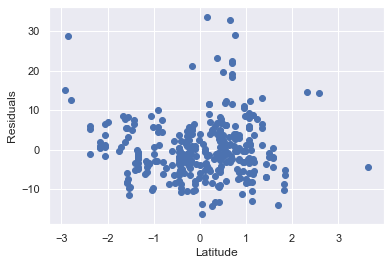

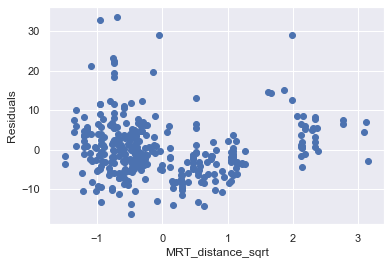

In [35]:

X_names_reduce_2 = [ 'intercept', 'Date','House_age','Conv_store_count','Latitude', 'MRT_distance_sqrt' ,'sigma' ]
X = (data_no_outlier[X_names_reduce_2[1:-1]].dropna()).to_numpy()
Model_reduce_2 = Bayesian_framework(len(X_names_reduce_2)-2,X_names_reduce_2,X,Y)
proba_set = Gaussian_model_np(Model_reduce_2)

# Define the model
Model_reduce_2.set_log_joint_prior(proba_set.log_joint_prior)
Model_reduce_2.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros( 7 )
init[0] = 30
init[-1] = 10
step_size = 0.3
num_samples = 15000

M_H_reduce_2 = Metropolis_hastings(Model_reduce_2,init ,step_size,num_samples)

M_H_reduce_2.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H_reduce_2.compute_statistic(burn_in)
M_H_reduce_2.summary()
tool_reduce_2 = Vizualisation_tool(Model_reduce_2,M_H_reduce_2)
tool_reduce_2.trace_visualization()
tool_reduce_2.autocorrelation_visualization()
tool_reduce_2.marginal_visualization()    
tool_reduce_2.fidelity()
tool_reduce_2.diagnostics()

In [36]:
f , p = F_test_reduce_model(tool_gaus , tool_reduce_2)
print( " F test , F is :", f," p value is :",p)

 F test , F is : 1.2674527553091786  p value is : 0.28553773552271555


We cannot reject the null hypothesis that the **dist_center**, **Longitude** , **Orientation** do not contribute to the prediction of the price per unit

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [01:10<00:00, 213.32it/s]


Acceptance rate :  0.34613333333333335
            features  Coeff   std                CI    2.5   25.0   50.0  \
0          intercept  37.31  0.41  [36.487, 38.136]  36.51  37.03  37.31   
1               Date   1.07  0.44    [0.192, 1.942]   0.22   0.78   1.06   
2          House_age  -2.54  0.42  [-3.372, -1.708]  -3.32  -2.83  -2.54   
3   Conv_store_count   2.20  0.55    [1.102, 3.290]   1.17   1.82   2.19   
4           Latitude   2.22  0.48    [1.251, 3.184]   1.26   1.89   2.22   
5  MRT_distance_sqrt  -6.48  0.58  [-7.649, -5.311]  -7.59  -6.88  -6.51   
6              sigma   7.51  0.30    [6.920, 8.101]   6.96   7.30   7.50   

    75.0   97.5  
0  37.59  38.12  
1   1.36   1.97  
2  -2.25  -1.70  
3   2.57   3.27  
4   2.53   3.17  
5  -6.11  -5.28  
6   7.71   8.10  


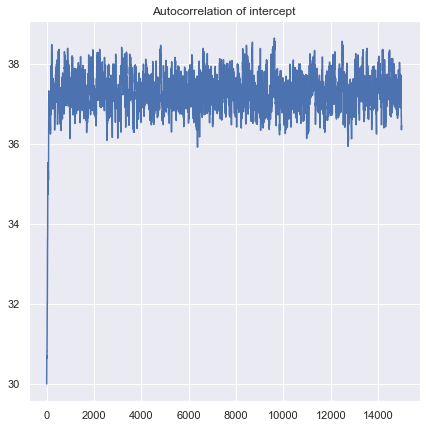

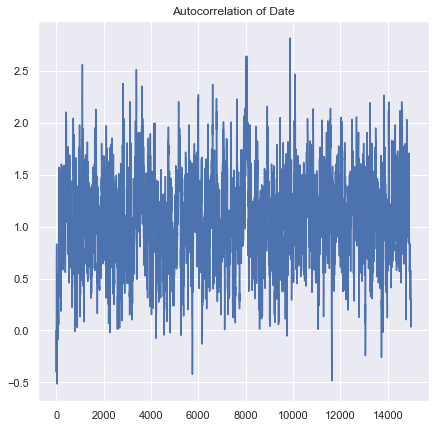

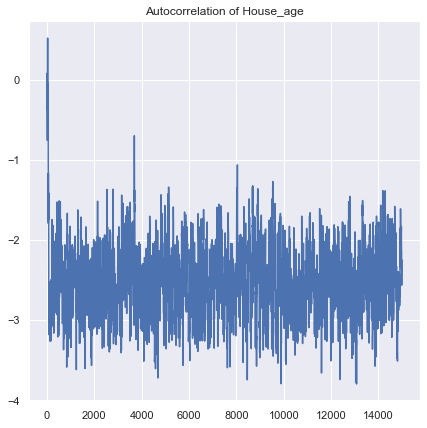

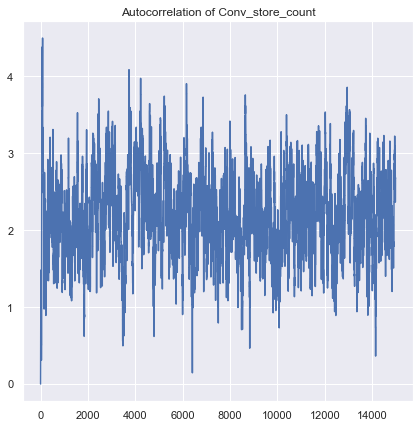

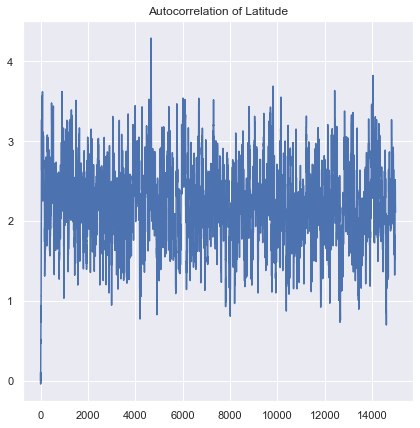

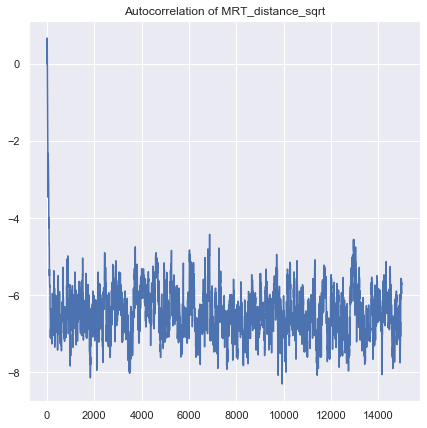

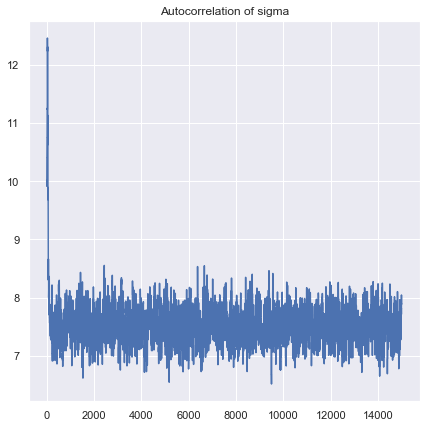

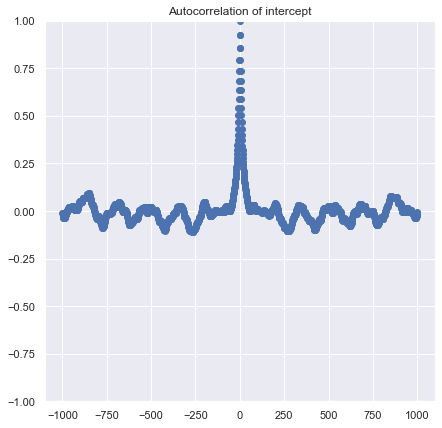

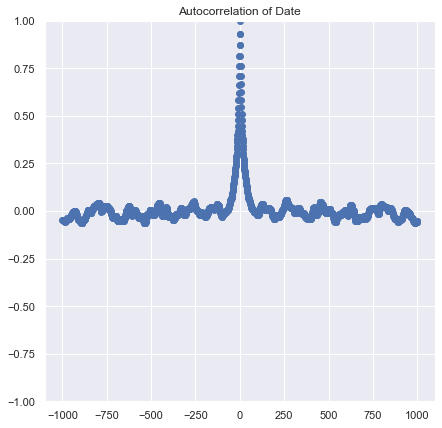

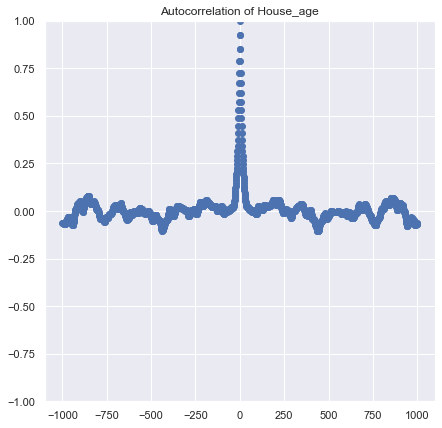

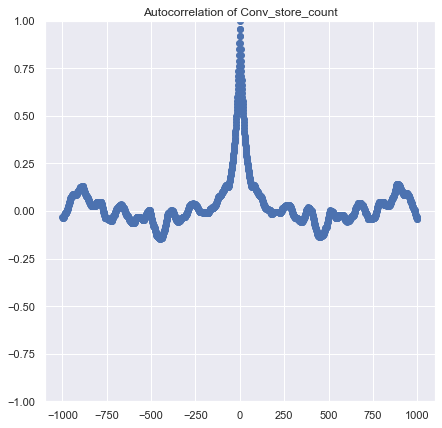

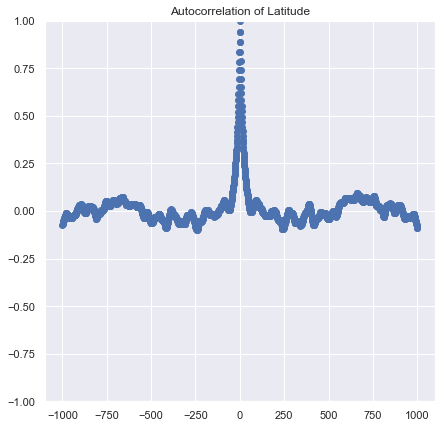

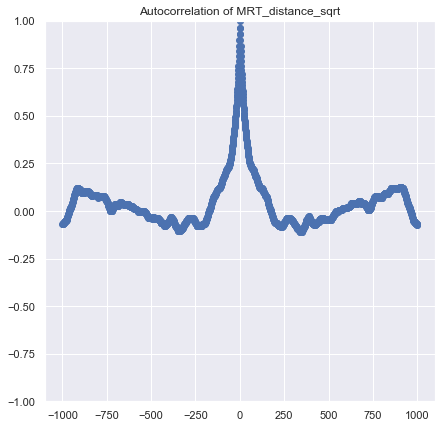

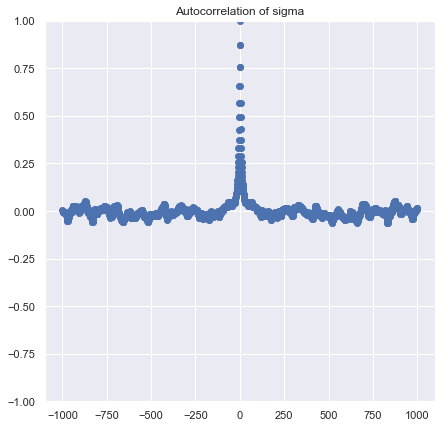

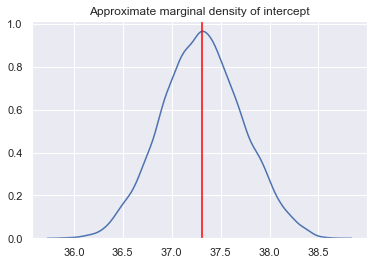

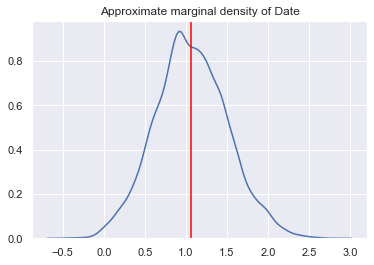

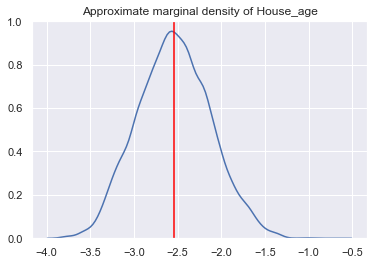

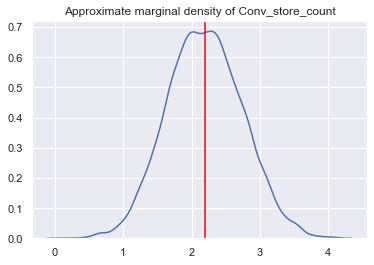

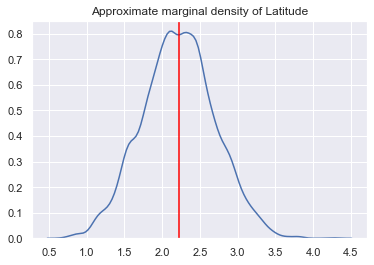

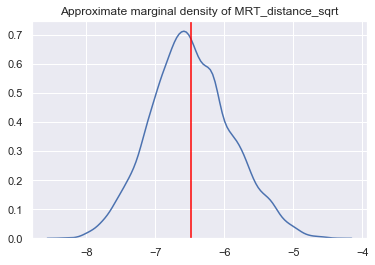

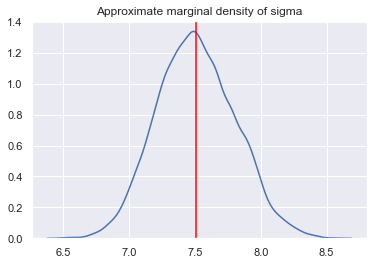

============ Fidelity summary ==================
 the mean square error is :  56.158499051600735
 MSE test is :  52.00471217798752
 PVE is  :  0.5947180259312012
 F   is  :  115.0795405063506
 p value :  1.1102230246251565e-16
 AIC is  :  2264.961172117376
 BIC is  :  2287.7375186219683
 AICc is :  2265.2220416825935


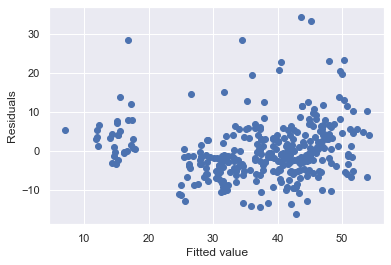

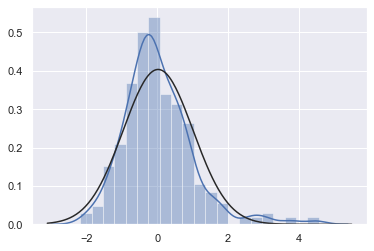

<Figure size 432x288 with 0 Axes>

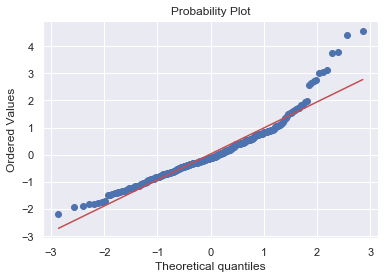

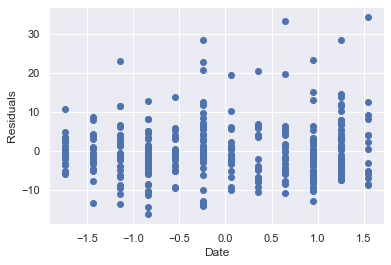

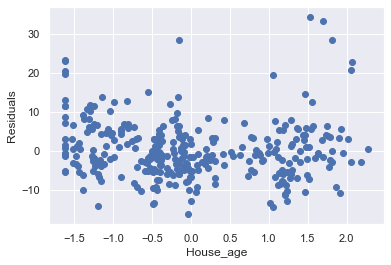

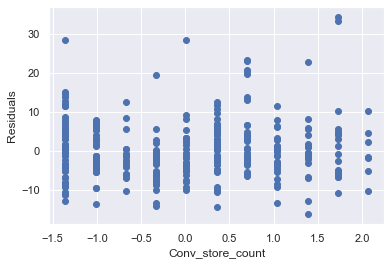

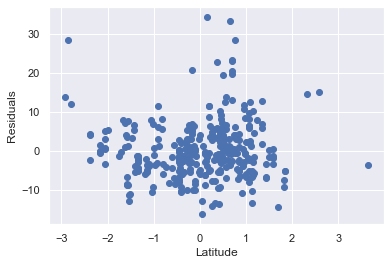

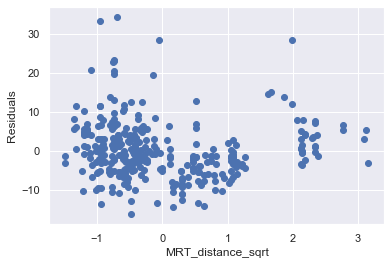

In [37]:
# If we rerun the model with the laplace prior let's see

X_names_reduce_2 = [ 'intercept', 'Date','House_age','Conv_store_count','Latitude', 'MRT_distance_sqrt' ,'sigma' ]
X = (data_no_outlier[X_names_reduce_2[1:-1]].dropna()).to_numpy()
Model_reduce_2 = Bayesian_framework(len(X_names_reduce_2)-2,X_names_reduce_2,X,Y)
proba_set = Gaussian_model_laplace_prior(Model_reduce_2)

# Define the model
Model_reduce_2.set_log_joint_prior(proba_set.log_joint_prior)
Model_reduce_2.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
init = np.zeros( 7 )
init[0] = 30
init[-1] = 10
step_size = 0.3
num_samples = 15000

M_H_reduce_2 = Metropolis_hastings(Model_reduce_2,init ,step_size,num_samples)

M_H_reduce_2.compute_statistic()

# We see that we can select a burn in that around 200
burn_in = 500

M_H_reduce_2.compute_statistic(burn_in)
M_H_reduce_2.summary()
tool_reduce_2 = Vizualisation_tool(Model_reduce_2,M_H_reduce_2)
tool_reduce_2.trace_visualization()
tool_reduce_2.autocorrelation_visualization()
tool_reduce_2.marginal_visualization()    
tool_reduce_2.fidelity()
tool_reduce_2.diagnostics()

The results are slighly worse than the gaussian prior model. The laplace model are more powerfull with more predictors in order to spot irrelevant predictor

# Different sampling method 

Let's try to make inference with different approximation and sampling algorithm

##### using gva

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

 the loss is : tensor([1390.9321], grad_fn=<NegBackward>)
 the grad is : tensor([  0.1166,  -2.0856,  10.3458, -25.6396, -23.3954, -25.0024,  32.1334,
         28.2585, -19.9902, -22.6237])
 norm of the gradient  tensor(68.4382)


  0%|▎                                                                                 | 1/300 [00:01<08:30,  1.71s/it]

tensor([36.9959,  0.0734, -0.3640,  0.9021,  0.8232,  0.8797, -1.1306, -0.9943,
         0.7033, 10.7960])


  3%|██▋                                                                              | 10/300 [00:15<07:38,  1.58s/it]

 the loss is : tensor([1239.5083], grad_fn=<NegBackward>)
 the grad is : tensor([-0.0752, -0.2862, -0.0229,  0.6573,  0.4133,  0.6133,  0.7410, -0.7894,
         0.7190,  0.2679])
 norm of the gradient  tensor(1.6817)


  4%|██▉                                                                              | 11/300 [00:16<07:15,  1.51s/it]

tensor([37.1842,  0.5392, -2.1780,  1.9328,  1.0776,  0.1874, -4.5913, -1.8908,
         0.2509,  7.7376])


  7%|█████▍                                                                           | 20/300 [00:32<07:38,  1.64s/it]

 the loss is : tensor([1237.9329], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.0247,  0.0994,  0.0019,  0.3382, -0.0403,  0.6577,  0.1582, -0.4009,
         0.5096,  0.1071])
 norm of the gradient  tensor(1.0080)


  7%|█████▋                                                                           | 21/300 [00:34<08:14,  1.77s/it]

tensor([37.1821,  0.5744, -2.1204,  1.7804,  1.1652,  0.1591, -5.0552, -1.6187,
         0.2419,  7.7096])


 10%|████████                                                                         | 30/300 [00:48<07:19,  1.63s/it]

 the loss is : tensor([1237.6337], grad_fn=<NegBackward>)
 the grad is : tensor([ 0.0296, -0.0815, -0.0258,  0.0416, -0.0228, -0.0974,  0.0697, -0.2625,
        -0.4939, -0.0353])
 norm of the gradient  tensor(0.5822)


 10%|████████▎                                                                        | 31/300 [00:50<07:24,  1.65s/it]

tensor([37.1713,  0.5859, -2.1142,  1.7386,  1.2541,  0.1538, -5.2927, -1.4161,
         0.2380,  7.7055])


 11%|████████▉                                                                        | 33/300 [00:54<08:04,  1.82s/it]

 Norm gradient < 0.5 stop 
 GVA method takes : 54.71  s to run 
            features      Coeff   std                CI        2.5       25.0  \
0          intercept  37.169998  0.45  [36.263, 38.071]  36.290001  36.860001   
1               Date   0.580000  0.35   [-0.114, 1.274]  -0.090000   0.340000   
2          House_age  -2.110000  0.48  [-3.060, -1.152]  -3.040000  -2.430000   
3   Conv_store_count   1.740000  0.61    [0.513, 2.968]   0.560000   1.330000   
4           Latitude   1.270000  0.65   [-0.036, 2.566]  -0.010000   0.830000   
5          Longitude   0.140000  0.32   [-0.505, 0.783]  -0.500000  -0.080000   
6  MRT_distance_sqrt  -5.300000  0.76  [-6.823, -3.782]  -6.810000  -5.810000   
7        dist_center  -1.400000  0.74   [-2.884, 0.075]  -2.840000  -1.890000   
8        orientation   0.230000  0.28   [-0.323, 0.790]  -0.310000   0.050000   
9              sigma   7.710000  0.34    [7.024, 8.388]   7.030000   7.480000   

    50.0       75.0       97.5  
0  37.16  3

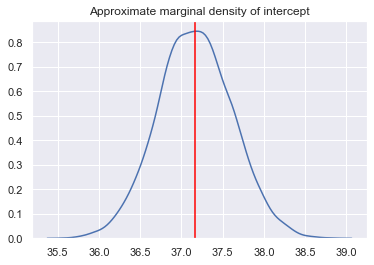

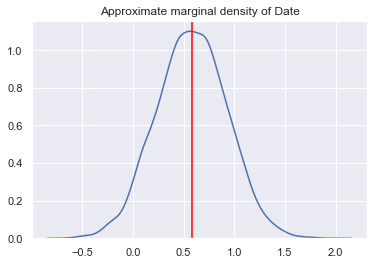

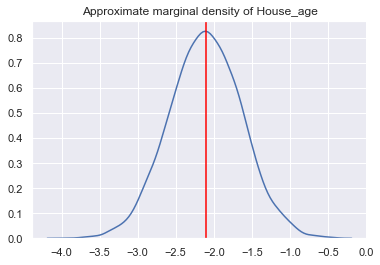

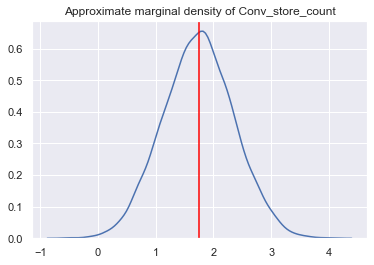

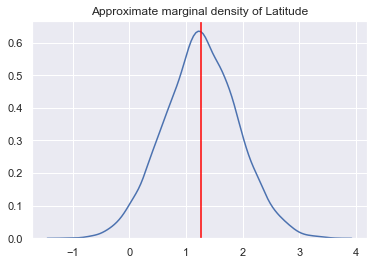

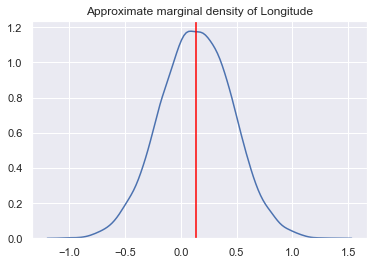

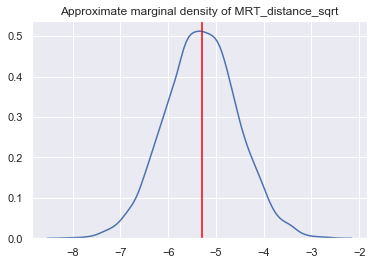

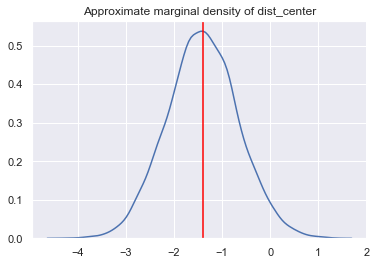

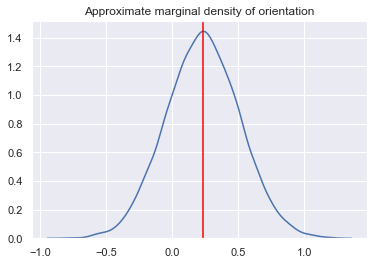

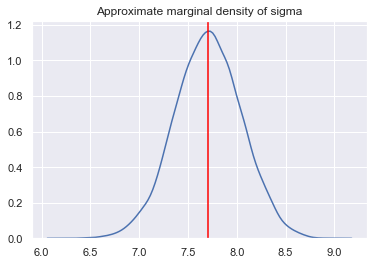

============ Fidelity summary ==================
 the mean square error is :  59.39832635446761
 MSE test is :  58.95280325561991
 PVE is  :  0.5041642284198773
 F   is  :  57.64748251752009
 p value :  1.1102230246251565e-16
 AIC is  :  2286.38273659437
 BIC is  :  2320.547256351258
 AICc is :  2286.946999917254


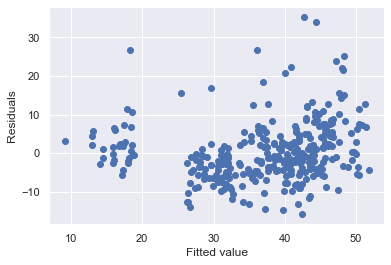

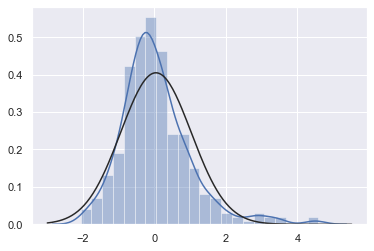

<Figure size 432x288 with 0 Axes>

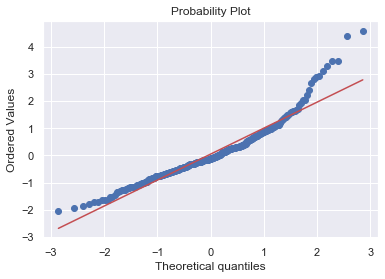

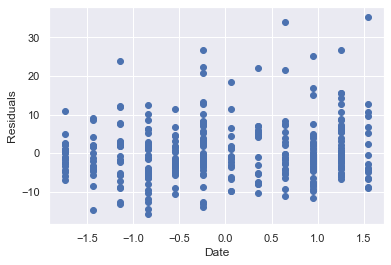

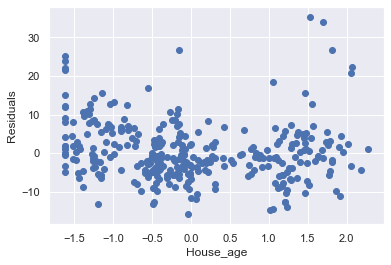

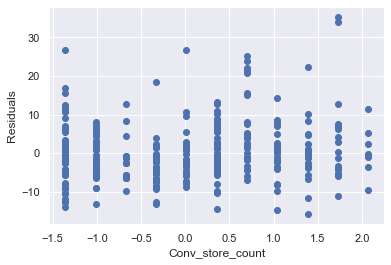

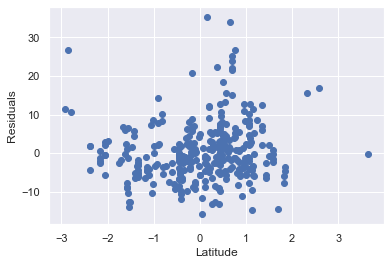

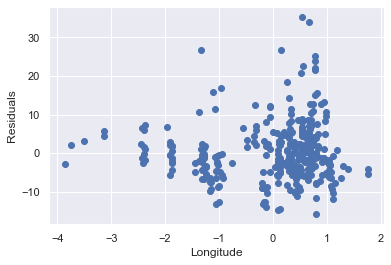

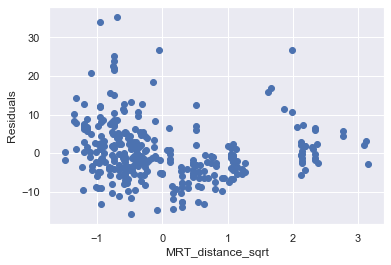

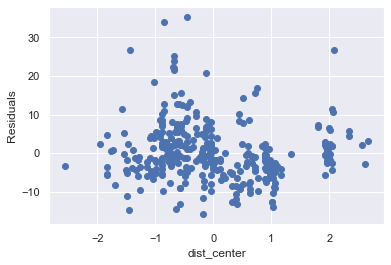

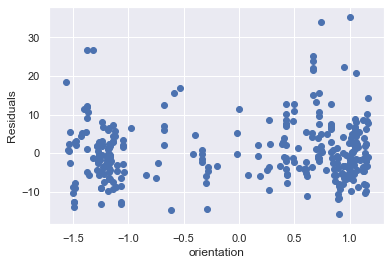

In [4]:
X_names = ['intercept'] + Names + ['sigma'] 
X = (data_no_outlier[X_names[1:-1]].dropna()).to_numpy()
Model = Bayesian_framework(len(X_names)-2,X_names,X,Y,torch_imp=True)
proba_set = Gaussian_model_laplace_prior_torch(Model )

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
gva = GVA(Model)
init_mu = torch.zeros(10)
init_mu[0]= 37
init_mu[-1] = 10
init_L = -2*torch.ones(10,10)
gva.compute_GVA_algo(init_mu,init_L, step_size = 0.07, show = True , line_search = True , stop_crit = 0.4)

tool = Vizualisation_tool(Model,gva)
tool.marginal_visualization()    
tool.fidelity()
tool.diagnostics()

##### Using important sampling 

tensor([3691.7945], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([2556.8058], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([2042.6784], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1654.1686], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1545.5047], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1464.6600], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1452.5066], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1433.7754], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1418.8124], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1406.4112], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1392.3754], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1379.3863], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1352.7555], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1311.6838], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1268.3786], dtype=torch.float64, grad_fn=<NegBackward>)
tensor([1250.0080], dtype=torch.float64,

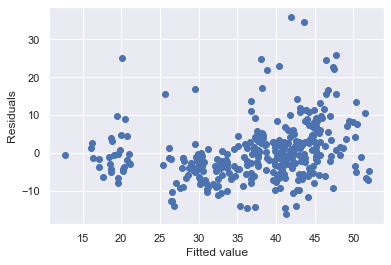

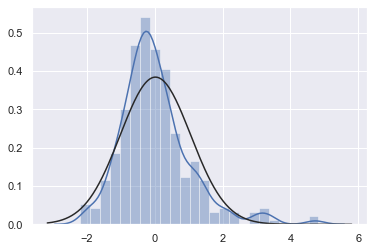

<Figure size 432x288 with 0 Axes>

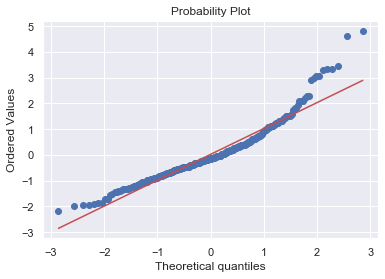

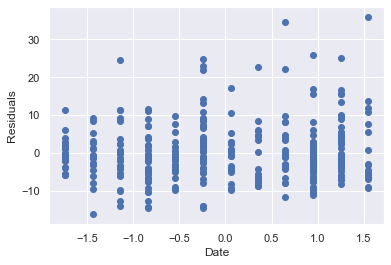

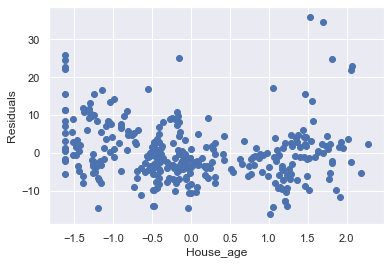

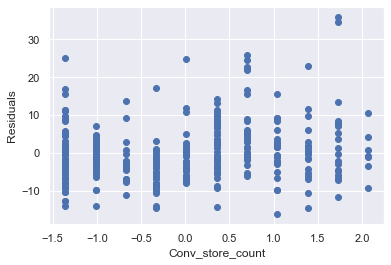

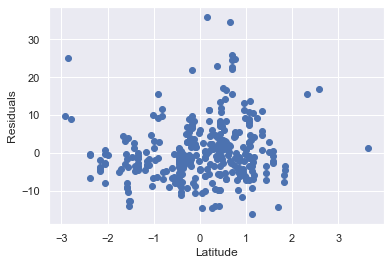

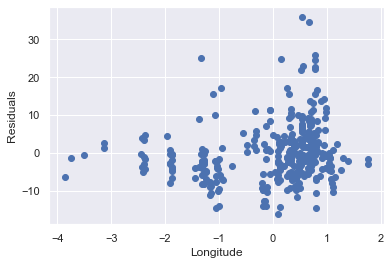

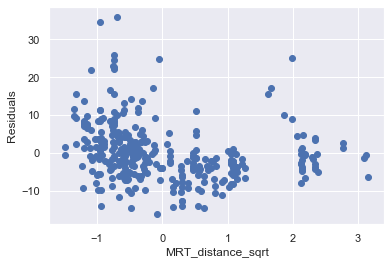

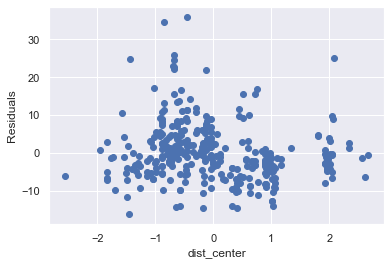

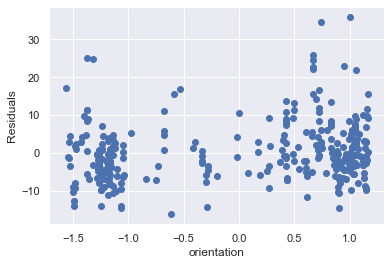

In [5]:
X_names = ['intercept'] + Names + ['sigma'] 
X = (data_no_outlier[X_names[1:-1]].dropna()).to_numpy()
Model = Bayesian_framework(len(X_names)-2,X_names,X,Y,torch_imp=True)
proba_set = Gaussian_model_laplace_prior_torch(Model )

# Define the model
Model.set_log_joint_prior(proba_set.log_joint_prior)
Model.set_log_likelihood(proba_set.log_likelihood)

# define a sample algorithm :
imp_s = Important_sampling(Model)
mean_proposal = imp_s.compute_mode_algo( line_search = True)
cov_mat = 0.5*np.ones(10)
proposal = st.multivariate_normal(mean = mean_proposal.view(-1).numpy() , cov = np.diag(cov_mat))
w,theta = imp_s.compute_algo(proposal , 1000000)
imp_s.compute_statistic()
imp_s.summary()

tool = Vizualisation_tool(Model,imp_s)
tool.fidelity()
tool.diagnostics()